# Imports

In [2]:
import mdtraj as md
import numpy as np
import pandas as pd
import encodermap as em
import loading_lizard as ll
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import nglview as ngl
import xarray as xr
import expansion_elephant as ep
import tensorflow as tf
import running_rabbit as rr
import sys
sys.path.insert(0, '/home/kevin/git/Backward/')
import backward
rr.update_gmx_environ('2021.1')

import glob, os, re, copy, pickle, hdbscan, subprocess, itertools, pathlib, pyemma, shutil, time, ast
%matplotlib notebook
%load_ext autoreload
%autoreload 2

/home/kevin/projects/encoder_map_private/encodermap/loading/features.py:36: UserWarning: Features need Unittests
  warnings.warn("Features need Unittests")


Also disabling gmx quotes
sourcing /home/soft/gromacs/gromacs-2021.1/inst/cuda_shared_20.04/bin/GMXRC.bash ...


# Define sims dir and create a pdb for testing psolPot

In [3]:
for dir_ in glob.glob("/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6*"):
    print(dir_)
    for file in glob.glob(dir_+'/*'):
        print(file)
    break

/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/data
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.gro
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.pdb
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/topol.tpr
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/traj.xtc
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/get_simulation_data.sh
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/traj_nojump.xtc
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/DONE.label


# MDtraj  SASA

In lieu to these experiments:

In [44]:
from IPython.display import Image

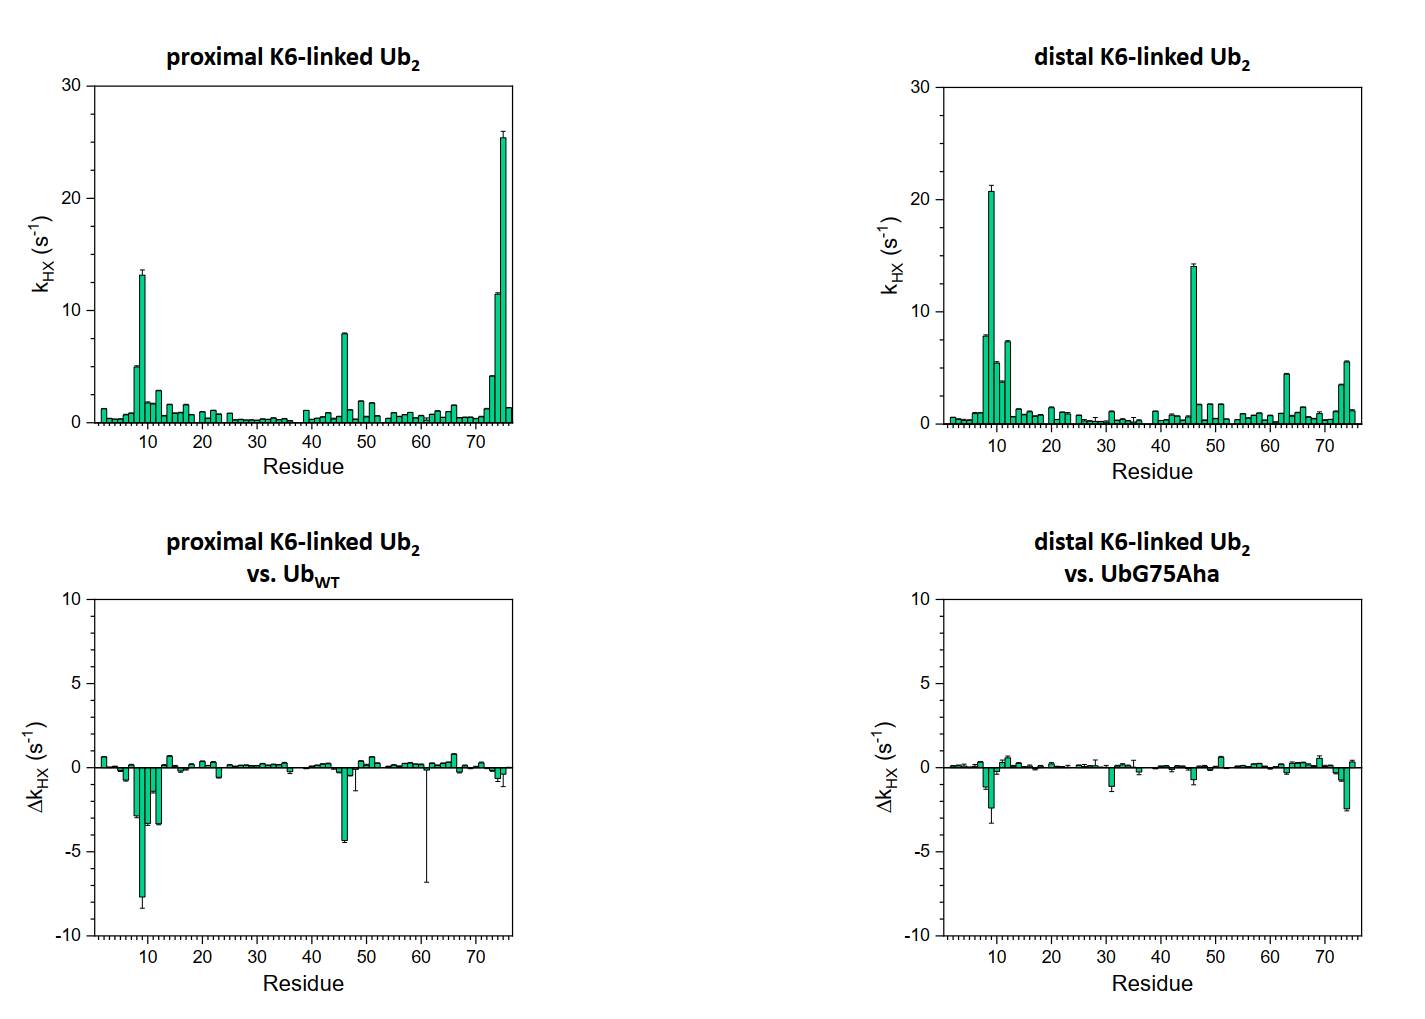

In [45]:
Image(filename='K6_new_mexico.PNG') 

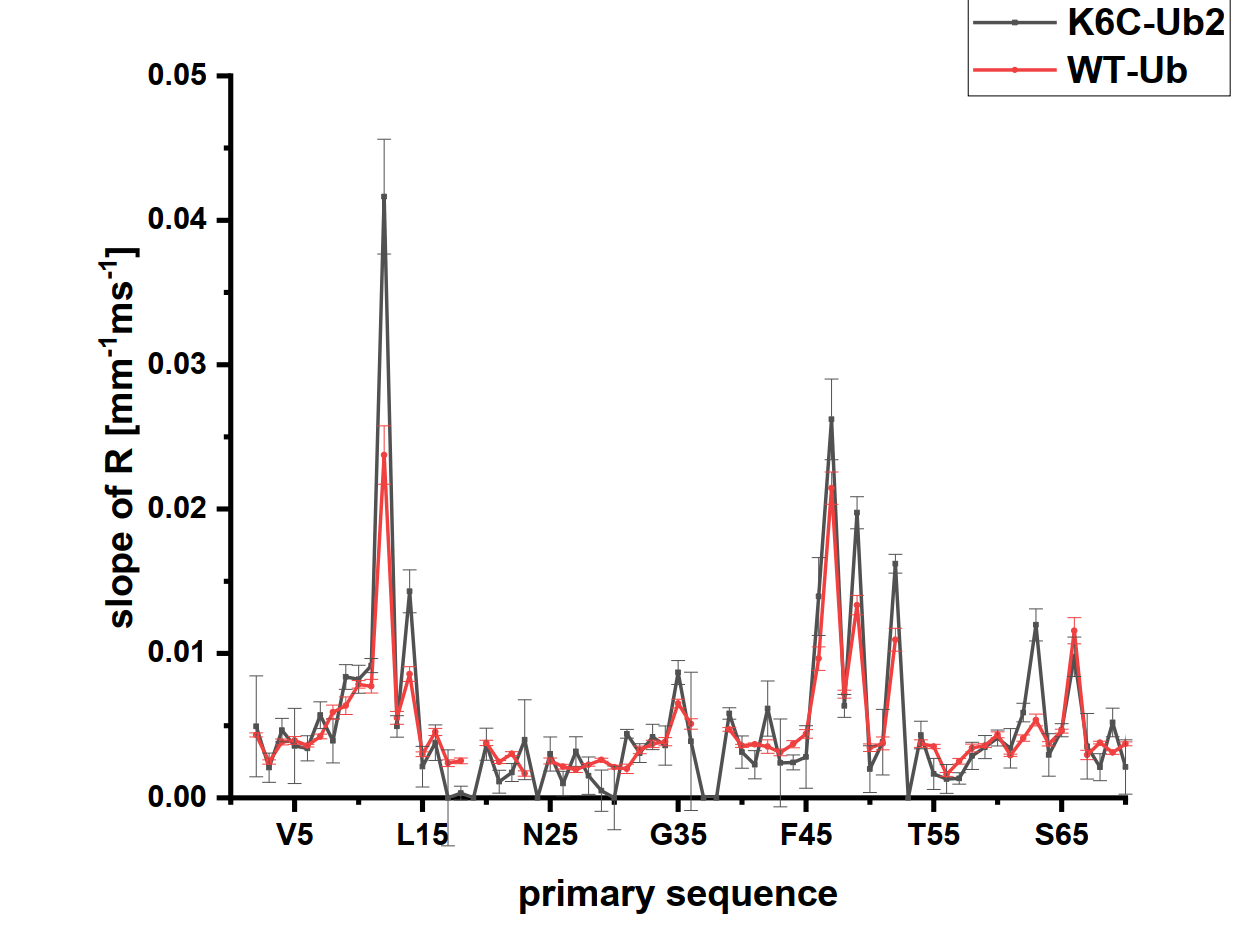

In [46]:
Image(filename='K6_solvent_PRE.PNG') 

In [47]:
SASA = []

if not os.path.isfile("SASA.npy"):
    for i, dir_ in enumerate(glob.glob("/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6*")):
        print(dir_)
        traj = md.load(dir_+'/traj_nojump.xtc', top=dir_+'/start.gro')
        SASA.append(md.shrake_rupley(traj, mode='residue', probe_radius=4.0))
        if i == 2:
            break
    SASA = np.vstack(SASA)
    np.save("SASA.npy", SASA)
else:
    SASA = np.load("SASA.npy")

/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_02
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_03


TypeError: _save_dispatcher() missing 1 required positional argument: 'arr'

In [16]:
SASA = md.shrake_rupley(traj, mode='residue')

In [21]:
_1 = copy.deepcopy(SASA)
_2 = copy.deepcopy(SASA)

In [22]:
_ = np.vstack([_1, _2])
print(_.shape)

(10002, 152)


# Plot

In [55]:
%matplotlib inline

Text(0.5, 1.0, 'diUb proximal SASA 4 nm')

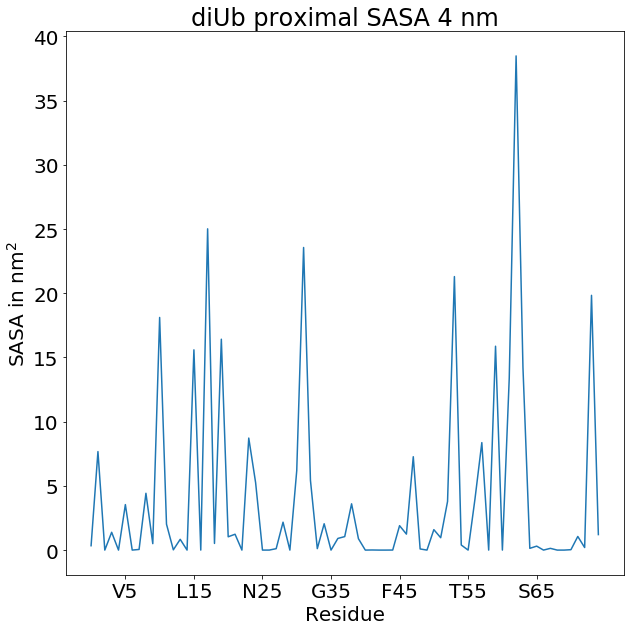

In [60]:
data = np.mean(SASA, axis=0)[:75]

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
mpl.rc('font', **font)

labels = ['V5', 'L15', 'N25', 'G35', 'F45', 'T55', 'S65']
tickpos = [5, 15, 25, 35, 45, 55, 65]

plt.figure(figsize=(10,10))
plt.plot(data)
ax = plt.gca()
ax.set_xticks(tickpos)
ax.set_xticklabels(labels)
ax.set_xlabel("Residue")
ax.set_ylabel(r"SASA in $\mathrm{nm^2}$")
ax.set_title("diUb proximal SASA 4 nm")

# Solvent PRE restraints?

In [41]:
traj = md.load("test_pdb.pdb")

with open("test_spre.tbl", 'r') as f:
    for r in list(traj.top.residues)[1:]:
        print(r, next(f).rstrip())

GLN2 assign (resid 2	 and name HN)   0.21 0.01
ILE3 assign (resid 3	 and name HN)   0.10 0.01
PHE4 assign (resid 4	 and name HN)   0.09 0.01
VAL5 assign (resid 5	 and name HN)   0.08 0.01
LYS6 assign (resid 6	 and name HN)   0.08 0.01
THR7 assign (resid 7	 and name HN)   0.12 0.01
LEU8 assign (resid 8	 and name HN)   0.16 0.01
THR9 assign (resid 9	 and name HN)   0.24 0.01
GLY10 assign (resid 10 and name HN)	0.33 0.01
LYS11 assign (resid 11 and name HN)	0.24 0.01
THR12 assign (resid 12 and name HN)	0.43 0.01
ILE13 assign (resid 13 and name HN)	0.12 0.01
THR14 assign (resid 14 and name HN)	0.28 0.01
LEU15 assign (resid 15 and name HN)	0.10 0.01
GLU16 assign (resid 16 and name HN)	0.18 0.01
VAL17 assign (resid 17 and name HN)	0.11 0.01
GLU18 assign (resid 18 and name HN)	0.15 0.01
PRO19 assign (resid 20 and name HN)	0.28 0.01
SER20 assign (resid 21 and name HN)	0.17 0.01
ASP21 assign (resid 22 and name HN)	0.21 0.01
THR22 assign (resid 23 and name HN)	0.10 0.01
ILE23 assign (resid 24 and

StopIteration: 

# Patricia's Correct features

In [20]:
from pyemma.coordinates.data.featurization.misc import CustomFeature
from pyemma.coordinates.data.featurization.angles import DihedralFeature, AngleFeature
from pyemma.coordinates.data.featurization.distances import DistanceFeature
from pyemma.coordinates.data.featurization.misc import SelectionFeature
from mdtraj.geometry.dihedral import (indices_phi, indices_psi, indices_omega,
                                      indices_chi1, indices_chi2, indices_chi3, indices_chi4, indices_chi5)
from mdtraj.core.residue_names import _AMINO_ACID_CODES
import copy, itertools

class CentralDihedrals(DihedralFeature):
    """"""
    __serialize_version = 0
    __serialize_fields = ('selstr', '_phi_inds', '_psi_inds', '_omega_inds')

    def __init__(self, topology, selstr=None, deg=True, cossin=False, periodic=True):
        self.top = topology
        self.selstr = selstr

        indices = indices_psi(self.top)
        if not selstr:
            self._psi_inds = indices
        else:
            self._psi_inds = indices[np.in1d(indices[:, 1],
                                             self.top.select(selstr), assume_unique=True)]

        indices = indices_omega(self.top)
        if not selstr:
            self._omega_inds = indices
        else:
            self._omega_inds = indices[np.in1d(indices[:, 1],
                                               self.top.select(selstr), assume_unique=True)]

        indices = indices_phi(self.top)
        if not selstr:
            self._phi_inds = indices
        else:
            self._phi_inds = indices[np.in1d(indices[:, 1],
                                             self.top.select(selstr), assume_unique=True)]

        # alternate phi, psi , omega pairs (phi_1, psi_1, omega_1..., phi_n, psi_n, omega_n)
        dih_indexes = np.array(list(psi_omega_phi for psi_omega_phi in
                                    zip(self._psi_inds, self._omega_inds, self._phi_inds))).reshape(-1, 4)

        super(CentralDihedrals, self).__init__(self.top, dih_indexes,
                                              deg=deg, cossin=cossin,
                                              periodic=periodic)
    def name(self):
        return 'CentralDihedrals'

    def describe(self):
        top = self.top
        getlbl = lambda at: f"hRESID  {at.residue.name}:{at.residue.resSeq:>4} CHAIN {at.residue.chain.index}"

        if self.cossin:
            sin_cos = ("COS(PSI %s)", "SIN(PSI %s)")
            labels_psi = [(sin_cos[0] % getlbl(top.atom(ires[1])),
                           sin_cos[1] % getlbl(top.atom(ires[1]))) for ires in self._psi_inds
                          ]
            sin_cos = ("COS(OMEGA %s)", "SIN(OMEGA %s)")
            labels_omega = [(sin_cos[0] % getlbl(top.atom(ires[1])),
                             sin_cos[1] % getlbl(top.atom(ires[1]))
                             ) for ires in self._omega_inds]
            sin_cos = ("COS(PHI %s)", "SIN(PHI %s)")
            labels_phi = [(sin_cos[0] % getlbl(top.atom(ires[1])),
                           sin_cos[1] % getlbl(top.atom(ires[1]))
                           ) for ires in self._phi_inds]
            # produce the same ordering as the given indices (phi_1, psi_1, ..., phi_n, psi_n)
            # or (cos(phi_1), sin(phi_1), cos(psi_1), sin(psi_1), ..., cos(phi_n), sin(phi_n), cos(psi_n), sin(psi_n))
            res = list(itertools.chain.from_iterable(
                itertools.chain.from_iterable(zip(labels_psi, labels_omega, labels_phi))))
        else:
            labels_psi = [
                f"CENTERDIH PSI   " + getlbl(top.atom(ires[1])) for ires in self._psi_inds]
            labels_omega = [
                "CENTERDIH OMEGA " + getlbl(top.atom(ires[1])) for ires in self._omega_inds]
            labels_phi = [
                "CENTERDIH PHI   " + getlbl(top.atom(ires[1])) for ires in self._phi_inds]
            res = list(itertools.chain.from_iterable(zip(labels_psi, labels_omega, labels_phi)))
        return res

class SideChainDihedrals(DihedralFeature):
    __serialize_version = 0
    __serialize_fields = ('_prefix_label_lengths',)
    options = ('chi1', 'chi2', 'chi3', 'chi4', 'chi5')

    def __init__(self, top, selstr=None, deg=True, cossin=False, periodic=True):
        which = self.options
        # get all dihedral index pairs
        from mdtraj.geometry import dihedral
        indices_dict = {k: getattr(dihedral, 'indices_%s' % k)(top) for k in which}
        if selstr:
            selection = top.select(selstr)
            truncated_indices_dict = {}
            for k, inds in indices_dict.items():
                mask = np.in1d(inds[:, 1], selection, assume_unique=True)
                truncated_indices_dict[k] = inds[mask]
            indices_dict = truncated_indices_dict

        valid = {k: indices_dict[k] for k in indices_dict if indices_dict[k].size > 0}
        if not valid:
            raise ValueError('Could not determine any side chain dihedrals for your topology!')
        
        #for key in indices_dict:
           # print(indices_dict[key])

        # make the chi angles per-residue
        self.per_res_dict = {}
        for r in top.residues:
            arrs = []
            bools = []
            for k in which:
                if np.any(np.in1d(valid[k], np.array([a.index for a in r.atoms]))):
                    where = np.where(np.in1d(valid[k].flatten(), np.array([a.index for a in r.atoms])))[0]
                    arr = valid[k].flatten()[where]
                    bools.append(True)
                    arrs.append(arr)
                else:
                    bools.append(False)
            if any(bools):
                self.per_res_dict[str(r)] = np.vstack(arrs)

        self._prefix_label_lengths = np.array([len(indices_dict[k]) if k in which else 0 for k in self.options])
        indices = np.vstack(self.per_res_dict.values())
       

        super(SideChainDihedrals, self).__init__(top=top, dih_indexes=indices, deg=deg, cossin=cossin, periodic=periodic)

    def name(self):
        return 'SideChainDihedrals'

    def describe(self):
        top = self.top
        getlbl = lambda at: f"hRESID  {at.residue.name}:{at.residue.resSeq:>4} CHAIN {at.residue.chain.index}"
        prefixes = []
        for lengths, label in zip(self._prefix_label_lengths, self.options):
            if self.cossin:
                lengths *= 2
            prefixes.extend([label.upper()] * lengths)
        prefixes = []
        for key, value in self.per_res_dict.items():
            if self.cossin:
                prefixes.extend([opt.upper() for opt in self.options[:value.shape[0]]] * 2)
            else:
                prefixes.extend([opt.upper() for opt in self.options[:value.shape[0]]])

        if self.cossin:
            cossin = ('COS({dih} {res})', 'SIN({dih} {res})')
            labels = [s.format(dih=prefixes[j + len(cossin) * i], res=getlbl(self.top.atom(ires[1])))
                      for i, ires in enumerate(self.angle_indexes)
                      for j, s in enumerate(cossin)]
        else:
            labels = ['SIDECHDIH {dih}  {res}'.format(dih=prefixes[i], res=getlbl(self.top.atom(ires[1])))
                      for i, ires in enumerate(self.angle_indexes)]

        return labels

class AllCartesians(SelectionFeature):
    __serialize_version = 0
    __serialize_fields = ('indexes',)
    prefix_label = 'POSITION '

    def __init__(self, top):
        self.top = top
        self.indexes = self.top.select('all')
        super().__init__(top, self.indexes)

    def name(self):
        return 'AllCartesians'

    def describe(self):
        getlbl = lambda \
            at: f"ATOM  {at.name:>4}:{at.index:5} {at.residue.name}:{at.residue.resSeq:>4} CHAIN {at.residue.chain.index}"
        labels = []
        for i in self.indexes:
            for pos in ['X', 'Y', 'Z']:
                labels.append(f"{self.prefix_label} {pos}     {getlbl(self.top.atom(i))}")
        return labels

class CentralCartesians(AllCartesians):
    __serialize_version = 0
    __serialize_fields = ('indexes',)
    prefix_label = 'CENTERPOS'

    def __init__(self, top):
        self.top = top
        super().__init__(self.top)
        self.central_indexes = self.top.select('name CA or name C or name N')
        assert len(self.central_indexes) < len(self.indexes)
        self.indexes = self.central_indexes
        self.dimension = 3 * len(self.indexes)
        
    def describe(self):
        getlbl = lambda \
            at: f"ATOM  {at.name:>4}:{at.index:5} {at.residue.name}:{at.residue.resSeq:>4} CHAIN {at.residue.chain.index}"
        labels = []
        for i in self.central_indexes:
            for pos in ['X', 'Y', 'Z']:
                labels.append(f"{self.prefix_label} {pos}     {getlbl(self.top.atom(i))}")
        return labels

    def name(self):
        return 'CentralCartesians'
    
    def transform(self, traj):
        newshape = (traj.xyz.shape[0], 3 * self.central_indexes.shape[0])
        return np.reshape(traj.xyz[:, self.central_indexes, :], newshape)

class SideChainCartesians(AllCartesians):
    __serialize_version = 0
    __serialize_fields = ('indexes',)
    prefix_label = 'hSIDECHPOS'

    def __init__(self, top):
        self.top = top
        super().__init__(self.top)
        central_indexes = self.top.select('not backbone')
        assert len(central_indexes) < len(self.indexes)
        self.indexes = central_indexes
        self.dimension = 3 * len(self.indexes)

    def name(self):
        return 'SideChainCartesians'

class AllBondDistances(DistanceFeature):
    __serialize_version = 0
    __serialize_fields = ('distance_indexes', 'periodic')
    prefix_label = 'DISTANCE        '

    def __init__(self, top, distance_indexes=None, periodic=True, check_aas=True):
        self.distance_indexes = distance_indexes
        if any([r.name not in _AMINO_ACID_CODES for r in top.residues]) and check_aas:
            raise Exception("Unkown amino acid in top.")
        if self.distance_indexes is None:
            self.top = top
            self.distance_indexes = np.vstack([[b[0].index, b[1].index] for b in self.top.bonds])
            #print(self.distance_indexes, len(self.distance_indexes))
            super().__init__(self.top, self.distance_indexes, periodic)
        else:
            super().__init__(self.top, self.distance_indexes, periodic)
            #print(self.distance_indexes, len(self.distance_indexes))
            

    def describe(self):
        getlbl = lambda at: f"ATOM  {at.name:>4}:{at.index:5} {at.residue.name}:{at.residue.resSeq:>4}"
        labels = []
        for i, j in self.distance_indexes:
            i, j = self.top.atom(i), self.top.atom(j)
            labels.append(
                f"{self.prefix_label}{getlbl(i)} DIST  {getlbl(j)} CHAIN {int(np.unique([a.residue.chain.index for a in [i, j]]))}")
        return labels

    def name(self):
        return 'AllBondDistances'

class CentralBondDistances(AllBondDistances):
    __serialize_version = 0
    __serialize_fields = ('distance_indexes', 'periodic')
    prefix_label = 'hCENTERDISTANCE  '

    def __init__(self, top, distance_indexes=None, periodic=True, check_aas=True):
        self.top = copy.deepcopy(top)
        if any([r.name == 'KAC' for r in top.residues]):
            self.top = add_KAC_backbone_bonds(self.top)
            check_aas = False
        select = self.top.select("name CA or name C or name N")
        print("Selected central atoms: ", len(select))
        
        
#         temp_list = []
#         for i in range(len(select)-1):
#             temp_list.append([select[i], select[i+1]])
#         temp_array = np.array(temp_list)
#         print("this is the array of the selected atoms:", temp_array)
#         print(len(temp_array))
        
        distance_indexes = []

        for b in self.top.bonds:
            #print(b)
            if np.all([np.isin(x.index, select) for x in b]):
                distance_indexes.append([x.index for x in b])
        distance_indexes = np.sort(distance_indexes, axis=0)
        
        #print("this is the bond array:", distance_indexes) 
        #print(len(distance_indexes))
        #print(np.setdiff1d(temp_array, distance_indexes))
        
        super().__init__(self.top, distance_indexes, periodic, check_aas=check_aas)  #distance_indexes
        

    def name(self):
        return 'CentralBondDistances'

class SideChainBondDistances(AllBondDistances):
    __serialize_version = 0
    __serialize_fields = ('distance_indexes', 'periodic')
    prefix_label = 'hSIDECHDISTANCE  '

    def __init__(self, top, periodic=True):
        self.top = top
        select = self.top.select("not backbone and (type C or type N ot type S or type O)")
        distance_indexes = []
        for b in self.top.bonds:
            if np.all([np.isin(x.index, select) for x in b]):
                distance_indexes.append([x.index for x in b])
        distance_indexes = np.sort(distance_indexes, axis=0)
        super().__init__(self.top, distance_indexes, periodic)

    def name(self):
        return 'SideChainBondDistances'

class CentralAngles(AngleFeature):
    __serialize_version = 0
    __serialize_fields = ('angle_indexes', 'deg', 'cossin', 'periodic')
    prefix_label = 'CENTERANGLE '

    def __init__(self, top, deg=True, cossin=False, periodic=True):
        self.top = copy.deepcopy(top)
        select = self.top.select("name CA or name C or name N")
        # add 4 bonds in KAC
        if any([r.name == 'KAC' for r in top.residues]):
            self.top = add_KAC_backbone_bonds(self.top)
        bonds = np.vstack([[x.index for x in b] for b in self.top.bonds])
        angle_indexes = []
        for a in select:
            where = np.where(bonds == a)
            possible_bonds = bonds[where[0], :]
            where = np.isin(possible_bonds, select)
            hits = np.count_nonzero(np.all(where, axis=1))
            if hits <= 1:
                continue
            elif hits == 2:
                where = np.all(where, axis=1)
                these = np.unique([self.top.atom(i).index for i in possible_bonds[where, :].flatten()])
                angle_indexes.append(these)
            elif hits == 3:
                raise Exception(f"Can't deal with these angles. One atom is part of three possible angles")
            elif hits == 4:
                raise Exception(f"Can't deal with these angles. One atom is part of four possible angles")
            else:
                raise Exception(f"Can't deal with these angles. One atom is part of three possible angles")
       
        angle_indexes = np.vstack(angle_indexes)
        angle_indexes = np.unique(angle_indexes, axis=0)
        # print(angle_indexes)
        super().__init__(self.top, angle_indexes, deg, cossin, periodic)

    def describe(self):
        getlbl = lambda at: f"ATOM {at.name:>4}:{at.index:5} {at.residue.name}:{at.residue.resSeq:>4}"
        labels = []
        for i, j, k in self.angle_indexes:
            i, j, k = self.top.atom(i), self.top.atom(j), self.top.atom(k)
            labels.append(
                f"{self.prefix_label}{getlbl(i)} ANGLE {getlbl(j)} ANGLE {getlbl(k)} CHAIN {int(np.unique([a.residue.chain.index for a in [i, j, k]]))}")
        return labels

    def name(self):
        return 'CentralAngles'

class SideChainAngles(AngleFeature):
    __serialize_version = 0
    __serialize_fields = ('angle_indexes', 'deg', 'cossin', 'periodic')
    prefix_label = 'SIDECHANGLE '

    def __init__(self, top, deg=True, cossin=False, periodic=True):
        self.top = copy.deepcopy(top)
        select = self.top.select("not backbone and (type C or type N ot type S or type O)")
        # add 4 bonds in KAC
        if any([r.name == 'KAC' for r in top.residues]):
            self.top = add_KAC_sidechain_bonds(self.top)
        bonds = np.vstack([[x.index for x in b] for b in self.top.bonds])
        angle_indexes = []
        for a in select:
            where = np.where(bonds == a)
            possible_bonds = bonds[where[0], :]
            where = np.isin(possible_bonds, select)
            hits = np.count_nonzero(np.all(where, axis=1))
            if hits <= 1:
                continue
            elif hits == 2:
                where = np.all(where, axis=1)
                these = np.unique([self.top.atom(i).index for i in possible_bonds[where, :].flatten()])
                #print([(i, self.top.atom(i)) for i in these])
                angle_indexes.append(these)
            elif hits == 3:
                w = np.vstack([where[:-1], [False, False]])
                w = np.all(w, axis=1)
                these = np.unique([self.top.atom(i).index for i in possible_bonds[w, :].flatten()])
                angle_indexes.append(these)
                #print([(i, self.top.atom(i)) for i in these])
                w = np.vstack([[False, False], where[1:]])
                w = np.all(w, axis=1)
                these = np.unique([self.top.atom(i).index for i in possible_bonds[w, :].flatten()])
                angle_indexes.append(these)
                #print([(i, self.top.atom(i)) for i in these])
            elif hits == 4:
                raise Exception(f"Can't deal with these angles. One atom is part of four possible angles")
            else:
                raise Exception(f"Can't deal with these angles. One atom is part of three possible angles")
        angle_indexes = np.vstack(angle_indexes)
        super().__init__(self.top, angle_indexes, deg, cossin, periodic)

    def describe(self):
        getlbl = lambda at: f"ATOM {at.name:>4}:{at.index:5} {at.residue.name}:{at.residue.resSeq:>4}"
        labels = []
        for i, j, k in self.angle_indexes:
            i, j, k = self.top.atom(i), self.top.atom(j), self.top.atom(k)
            labels.append(
                f"{self.prefix_label}{getlbl(i)} ANGLE {getlbl(j)} ANGLE {getlbl(k)} CHAIN {int(np.unique([a.residue.chain.index for a in [i, j, k]]))}")
        return labels

    def name(self):
        return 'SideChainAngles'

# Encodermap

## Instantiate Info_all

In [2]:
trajfiles = glob.glob("/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6*/*nojump.xtc")
top_file = "/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.pdb"


trajs = em.Info_all(trajfiles, top_file, common_str='k6')
print(trajs)

encodermap.Info_all object. Current backend is no_load. Containing 12 trajs. Common str is ['k6']. Not containing any CVs.


## OpenMM

Use Kai's CustomGromacsTopFile for GROMOS54a7-isop support

In [59]:
%%bash

# mv /home/kevin/projects/encoder_map_private/development/custom_gromacstopfile.py /home/kevin/projects/tobias_schneider/

In [43]:
from custom_gromacstopfile import CustomGromacsTopFile

In [56]:
gro_file = "/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.gro"
top_file = "/mnt/scc3/andrejb/ARCHIVE/simulations/2017_04_27_G_2ub_k6_01_01/system.top"

import simtk.openmm.app as app
import simtk.openmm as mm


gro = app.GromacsGroFile(gro_file)
top = CustomGromacsTopFile(top_file, periodicBoxVectors=gro.getPeriodicBoxVectors(), includeDir='/home/andrejb/Research/DEVA/2016_11_27_diub_GROMOS/')
# system = top.createSystem()

('/mnt/scc3/andrejb/ARCHIVE/simulations/2017_04_27_G_2ub_k6_01_01', '/home/andrejb/Research/DEVA/2016_11_27_diub_GROMOS/', '/mnt/scc3/andrejb/ARCHIVE/simulations/2017_04_27_G_2ub_k6_01_01')
('/mnt/scc3/andrejb/ARCHIVE/simulations/2017_04_27_G_2ub_k6_01_01', '/home/andrejb/Research/DEVA/2016_11_27_diub_GROMOS/', '/home/andrejb/Research/DEVA/2016_11_27_diub_GROMOS/./gromos54a7-isop.ff')
('/mnt/scc3/andrejb/ARCHIVE/simulations/2017_04_27_G_2ub_k6_01_01', '/home/andrejb/Research/DEVA/2016_11_27_diub_GROMOS/', '/home/andrejb/Research/DEVA/2016_11_27_diub_GROMOS/./gromos54a7-isop.ff')
('/mnt/scc3/andrejb/ARCHIVE/simulations/2017_04_27_G_2ub_k6_01_01', '/home/andrejb/Research/DEVA/2016_11_27_diub_GROMOS/', '/home/andrejb/Research/DEVA/2016_11_27_diub_GROMOS/./gromos54a7-isop.ff')
('/mnt/scc3/andrejb/ARCHIVE/simulations/2017_04_27_G_2ub_k6_01_01', '/home/andrejb/Research/DEVA/2016_11_27_diub_GROMOS/', '/mnt/scc3/andrejb/ARCHIVE/simulations/2017_04_27_G_2ub_k6_01_01')
('/mnt/scc3/andrejb/ARCHIV

In [57]:
help(top.topology)

Help on Topology in module simtk.openmm.app.topology object:

class Topology(builtins.object)
 |  Topology stores the topological information about a system.
 |  
 |  The structure of a Topology object is similar to that of a PDB file.  It consists of a set of Chains
 |  (often but not always corresponding to polymer chains).  Each Chain contains a set of Residues,
 |  and each Residue contains a set of Atoms.  In addition, the Topology stores a list of which atom
 |  pairs are bonded to each other, and the dimensions of the crystallographic unit cell.
 |  
 |  Atom and residue names should follow the PDB 3.0 nomenclature for all molecules for which one exists.
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Create a new Topology object
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  addAtom(self, name, element, residue, id=None)
 |      Create a new Atom and add it to the Topology.
 |      
 |      Parameters
 |      ----------
 |      name : string
 |      

**Create mdtraj stopology**

In [58]:
top = md.Topology.from_openmm(top.topology)
print(top)

<mdtraj.Topology with 17111 chains, 17262 residues, 52851 atoms, 35754 bonds>


**Remove solvent**

In [68]:
print(top.n_atoms)
top_no_solv = copy.deepcopy(top)
select = top_no_solv.select("water")
iter_ = 0
while len(select) > 0:
    top_no_solv.delete_atom_by_index(select[0])
    select = top_no_solv.select("water")
    if iter_ % 100 == 0:
        print(iter_)
    iter_ += 1
print(top_no_solv.n_atoms)

52851
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18

**According to gromacs it needs to have 1521 atoms**

Try to load a nojump traj with this top. Save a h5 file of the traj for later top use and check the bonds.

In [4]:
# traj = md.load(trajfiles[0], top=top_no_solv)
# frame = traj[0]
# frame = frame.atom_slice(frame.top.select("not water"))
# frame.save_hdf5("2017_04_27_G_2ub_k6_01_01_traj_nojump_correct_topology.h5")
frame = md.load_hdf5('2017_04_27_G_2ub_k6_01_01_traj_nojump_correct_topology.h5')
top_no_solv = frame.top
# with open('2017_04_27_G_2ub_k6_01_01_traj_nojump_correct_topology.pickle', 'wb') as f:
#     pickle.dump(frame, f)
# with open('2017_04_27_G_2ub_k6_01_01_traj_nojump_correct_topology.pickle', 'rb') as f:
#     frame = pickle.load(f)

**Correct number of bonds are in there. Nice.**

## Encodermap with CA distances

### Create data

In [9]:
CA_indices = frame.top.select("name CA")
CA_indices = np.array(list(itertools.combinations(CA_indices, 2)))
print(CA_indices.shape)

(11476, 2)


In [13]:
if os.path.isfile('Ubi_K6_CA_pairwise_distances.npy'):
    distances = np.load('Ubi_K6_CA_pairwise_distances.npy')
else:
    distances = []
    for i, trajfile in enumerate(trajfiles):
        traj = md.load(trajfile, top=top_no_solv)
        distances.append(md.compute_distances(traj, CA_indices, periodic=False))
    distances = np.vstack(distances)
    np.save("/home/kevin/projects/tobias_schneider/Ubi_K6_CA_pairwise_distances.npy", distances)

### CG data

In [3]:
cg_trajfiles = glob.glob('/home/andrejb/Research/SIMS/*_2ub_k6_*/traj_nojump.xtc')
# cg_top_file = '/home/andrejb/Research/SIMS/2017_08_01_2ub_k6_01_03/start.pdb'

for cg_trajfile in cg_trajfiles:
    basename = cg_trajfile.split('/')[-2]
    if os.path.isfile(f'CG_CA_distances/{basename}.npy'):
        continue
    cg_top_file = os.path.split(cg_trajfile)[0] + '/start.pdb'
    traj = md.load(cg_trajfile, top=cg_top_file)
    traj = traj.atom_slice(traj.top.select('not water'))
    if any([a.name == 'BB' for a in traj.top.atoms]):
        CA_indices = traj.top.select("name BB")
        CA_indices = np.array(list(itertools.combinations(CA_indices, 2)))
    else:
        CA_indices = frame.top.select("name CA")
        CA_indices = np.array(list(itertools.combinations(CA_indices, 2)))
    _ = md.compute_distances(traj, CA_indices)
    np.save(f'CG_CA_distances/{basename}.npy', _)

In [4]:
arr.shape

(100001, 11476)

In [2]:
trajs = []
distances = []
for i, file in enumerate(glob.glob('CG_CA_distances/*.npy')):
    basename = os.path.basename(file).split('.')[0]
    print(i, basename)
    if not os.path.isfile(f"CG_CA_distances/{basename}.nc"):
        try:
            arr = np.load(file)
            ds = xr.Dataset({'CA_distances': (['frame_no', 'distance'], arr)})
            ds.to_netcdf(f"CG_CA_distances/{basename}.nc")
        finally:
            del arr
            del ds
    else:
        ds = xr.open_dataset(f"CG_CA_distances/{basename}.nc")
        traj_file = f"/home/andrejb/Research/SIMS/{basename}/traj_nojump.xtc"
        top_file = f"/home/andrejb/Research/SIMS/{basename}/start.pdb"
        if ds.sizes['frame_no'] > 10000:
            # arr = ds[{'frame_no': slice(None, None, 100)}]['CA_distances'].values
            trajs.append(em.Info_single(traj_file, top_file, index=slice(None, None, 100)))
        else:
            # arr = ds['CA_distances'].values
            trajs.append(em.Info_single(traj_file, top_file))
#         distances.append(arr)
# distances = np.vstack(distances)
# np.save("Ubi_K6_CA_pairwise_distances_with_cg_stride_100.npy", distances)
distances = np.load('Ubi_K6_CA_pairwise_distances_with_cg_stride_100.npy')

0 2016_08_09_2ub_k6_01
1 2016_08_09_2ub_k6_02
2 2016_11_26_2ub_k6_03
3 2016_11_26_2ub_k6_04
4 2016_11_26_2ub_k6_05
5 2016_11_26_2ub_k6_06
6 2017_04_27_G_2ub_k6_01_01
7 2017_04_27_G_2ub_k6_01_02
8 2017_04_27_G_2ub_k6_01_03
9 2017_04_27_G_2ub_k6_01_04
10 2017_04_27_G_2ub_k6_01_05
11 2017_04_27_G_2ub_k6_01_06
12 2017_04_27_G_2ub_k6_02_01
13 2017_04_27_G_2ub_k6_02_02
14 2017_04_27_G_2ub_k6_02_03
15 2017_04_27_G_2ub_k6_02_04
16 2017_04_27_G_2ub_k6_02_05
17 2017_04_27_G_2ub_k6_02_06
18 2017_06_09_GfM_SMmin_2ub_k6_01
19 2017_07_21_2ub_k6_01_02
20 2017_07_21_2ub_k6_02_02
21 2017_08_01_2ub_k6_01_03
22 2017_08_01_2ub_k6_01_04
23 2017_08_01_2ub_k6_01_05
24 2017_08_01_2ub_k6_01_06
25 2017_08_01_2ub_k6_02_03
26 2017_08_01_2ub_k6_02_04
27 2017_08_01_2ub_k6_02_05
28 2017_08_01_2ub_k6_02_06
29 2019_02_22_2ub_k6_01_07
30 2019_02_22_2ub_k6_01_08
31 2019_02_22_2ub_k6_01_09
32 2019_02_22_2ub_k6_01_10
33 2019_02_22_2ub_k6_02_07
34 2019_02_22_2ub_k6_02_08
35 2019_02_22_2ub_k6_02_09
36 2019_02_22_2ub_k6_02_1

In [2]:
aa_distances = np.load("/home/kevin/projects/tobias_schneider/Ubi_K6_CA_pairwise_distances.npy")
print(aa_distances.shape)

(60012, 11476)


### Train

In [18]:
import encodermap.encodermap_tf1 as em
import tensorflow.compat.v1 as tf

run_dir = "/home/kevin/projects/tobias_schneider/CA_distances_runs/"

os.makedirs(run_dir, exist_ok=True)

parameters = em.Parameters()
parameters.main_path = em.misc.run_path(run_dir)
parameters.dist_sig_parameters = (40, 12, 10, 1, 2, 5)
parameters.n_steps = 10000
parameters.n_neurons = [300, 300, 300, 10]
parameters.activation_functions = ['', 'tanh', 'tanh', 'tanh', '']

In [19]:
print(parameters.dist_sig_parameters)
print(parameters.main_path)

(40, 12, 10, 1, 2, 5)
/home/kevin/projects/tobias_schneider/CA_distances_runs/run6


<IPython.core.display.Javascript object>


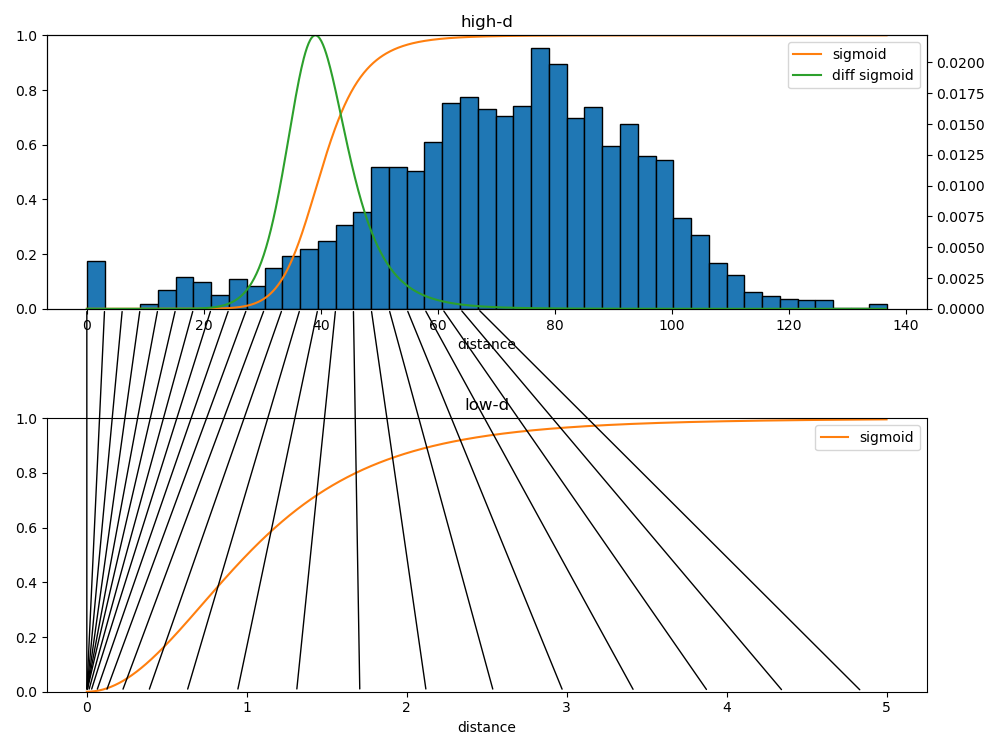

(<AxesSubplot:title={'center':'high-d'}, xlabel='distance'>,
 <AxesSubplot:label='ac897346-7b7d-42a9-a438-b7a5844d2e7c'>,
 <AxesSubplot:title={'center':'low-d'}, xlabel='distance'>)

In [20]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 7.5))
em.plot.distance_histogram(distances[::1000], parameters.periodicity, parameters.dist_sig_parameters, axes=axes)

In [12]:
# autoencoder = em.Autoencoder(parameters, distances)
import encodermap.encodermap_tf1 as em
import tensorflow.compat.v1 as tf
parameters = em.Parameters.load('CA_distances_runs/run5/parameters.json')
autoencoder = em.Autoencoder(parameters, aa_distances, read_only=True, checkpoint_path='CA_distances_runs/run5/checkpoints/step10000.ckpt')

Output files are saved to CA_distances_runs/run5 as defined in 'main_path' in the parameters.
Disabling eager execution


In [22]:
# autoencoder.train()

100%|██████████| 10000/10000 [33:29<00:00,  4.98it/s] 


In [14]:
lowd = autoencoder.encode(aa_distances)
np.save("atomistic_lowd.npy", lowd)

### Plot lowd

<IPython.core.display.Javascript object>


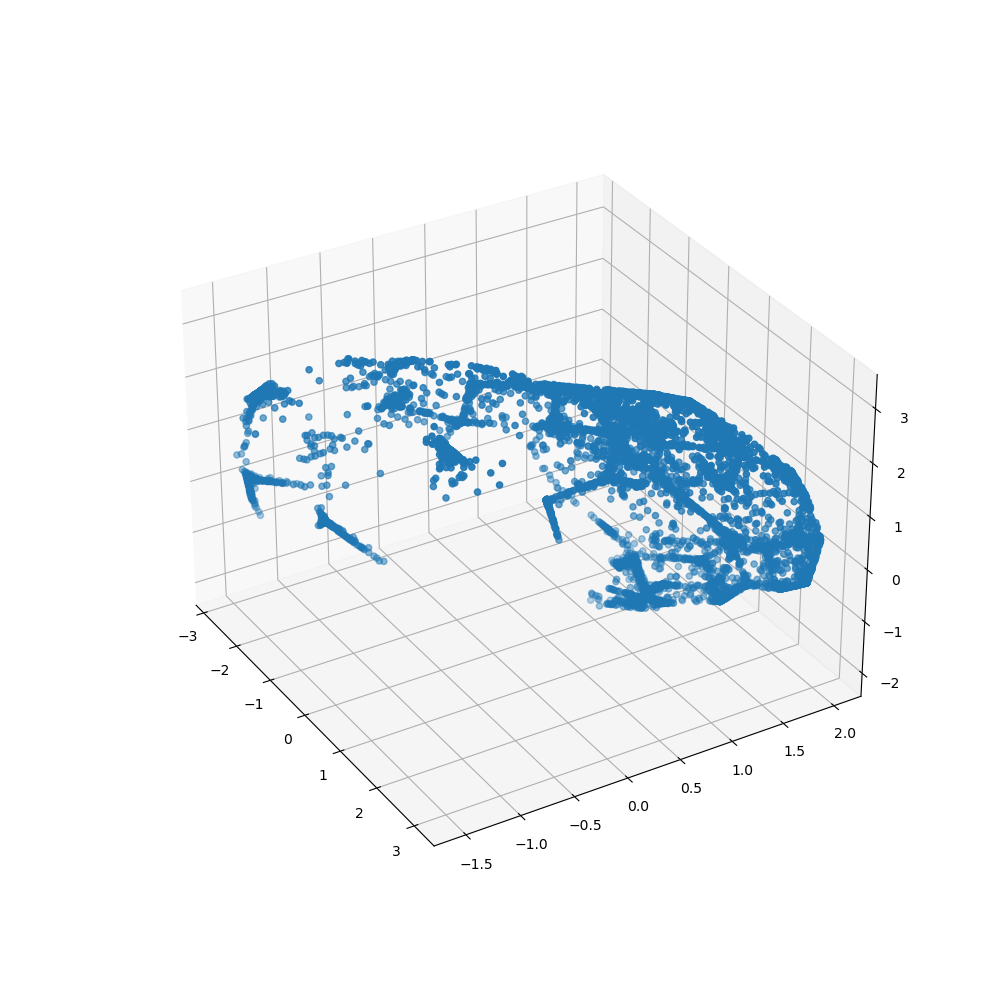

In [15]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*lowd[::5,:3].T)

### Cluster

In [16]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=250, cluster_selection_method='leaf').fit(lowd)

In [33]:
np.save('clusterer_AA_labels.npy', clusterer.labels_)

In [17]:
np.unique(clusterer.labels_)
color_palette = sns.color_palette('deep', clusterer.labels_.max() + 1)
cluster_colors = [(*color_palette[x], 1) if x >= 0
                  else (0.5, 0.5, 0.5, 0.05)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

<IPython.core.display.Javascript object>


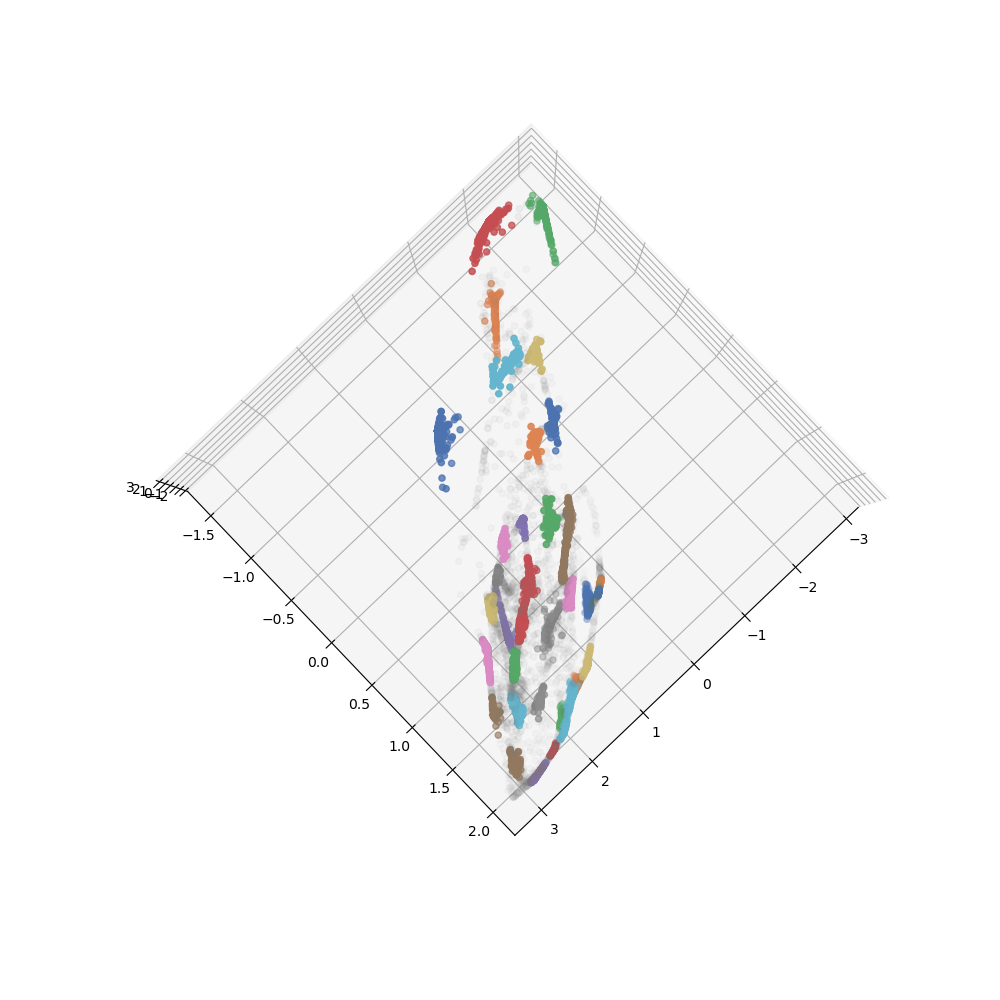

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*lowd[::5,:3].T, c=cluster_colors[::5])

### Write 100 structures per cluster

In [21]:
import encodermap as em

In [22]:
trajfiles = glob.glob("/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6*/*nojump.xtc")
trajs = em.Info_all(trajfiles, tops=["/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.pdb"], common_str=['k6'])
index_arr = trajs.index_arr   

In [23]:
basedir = "CA_distances_cluster_trajs/"
pdbs_per_cluster = 100

for cluster_no in range(clusterer.labels_.max().astype(int)):
    cluster_dir = os.path.join(basedir, 'cluster_'+str(cluster_no))
    os.makedirs(cluster_dir, exist_ok=True)
    print(cluster_dir)
    print(cluster_no)
    where = np.where(clusterer.labels_ == cluster_no)[0]
    idx = np.round(np.linspace(0, len(where) - 1, pdbs_per_cluster)).astype(int)
    cluster_index = index_arr[where[idx]]
    traj = trajs[cluster_index]
    for i, frame in enumerate(traj):
        pdb_name = os.path.join(cluster_dir + f"/cluster_{cluster_no}_frame_{i}.pdb")
        assert frame.traj.n_frames == 1
        frame = frame.traj
        frame = frame.atom_slice(frame.top.select("not resname LYQ and not resname GLQ"))
        frame.save_pdb(pdb_name)
        with open(pdb_name, 'r') as f:
            lines = f.readlines()
        new_lines = []
        increase = False
        for l in lines:
            if 'ATOM' in l:
                if increase:
                    old_int = l[22:27]
                    new_int = f"{int(l[22:27]) + 75:>4}"
                    l = l.replace(old_int, new_int)
                    new_lines.append(l)
                else:
                    new_lines.append(l)
                if int(l[22:27]) >= 75 and 'O   GLY A' in l:
                    increase = True
            elif 'TER    1506      GLY A  76' in l:
                l = 'TER    1506      GLY A 151\n'
                new_lines.append(l)
            else:
                new_lines.append(l)
        with open(pdb_name, 'w') as f:
            f.writelines(new_lines)
        subprocess.call(f'./run_psolpot.py -pdb {pdb_name} -restraints diUbi_empty_spre.tbl', shell=True)

CA_distances_cluster_trajs/cluster_0
0
CA_distances_cluster_trajs/cluster_1
1
CA_distances_cluster_trajs/cluster_2
2
CA_distances_cluster_trajs/cluster_3
3
CA_distances_cluster_trajs/cluster_4
4
CA_distances_cluster_trajs/cluster_5
5
CA_distances_cluster_trajs/cluster_6
6
CA_distances_cluster_trajs/cluster_7
7
CA_distances_cluster_trajs/cluster_8
8
CA_distances_cluster_trajs/cluster_9
9
CA_distances_cluster_trajs/cluster_10
10
CA_distances_cluster_trajs/cluster_11
11
CA_distances_cluster_trajs/cluster_12
12
CA_distances_cluster_trajs/cluster_13
13
CA_distances_cluster_trajs/cluster_14
14
CA_distances_cluster_trajs/cluster_15
15
CA_distances_cluster_trajs/cluster_16
16
CA_distances_cluster_trajs/cluster_17
17
CA_distances_cluster_trajs/cluster_18
18
CA_distances_cluster_trajs/cluster_19
19
CA_distances_cluster_trajs/cluster_20
20
CA_distances_cluster_trajs/cluster_21
21
CA_distances_cluster_trajs/cluster_22
22
CA_distances_cluster_trajs/cluster_23
23
CA_distances_cluster_trajs/cluster_2

### Create an empty restraints.tbl

In [247]:
def label(resSeq):
    return f"assign (resid {resSeq:<2} and name HN)	0.00 0.01"

new_lines = []
increase = False
for r in frame.top.residues:
    resseq = r.resSeq
    if increase:
        resseq += 75
    if resseq >= 75:
        increase = True
    new_lines.append(label(resseq))
new_lines = '\n'.join(new_lines)
with open("diUbi_empty_spre.tbl", 'w') as f:
    f.writelines(new_lines)

### Create an psolpot.py file to clear the Kernel after each run.

In [264]:
# %%writefile run_psolpot.py
#!/home/kevin/software/xplor-nih/executables/pyXplor

import os, sys, re, glob, os, shutil, json, argparse
import numpy as np

def output_json(calc_energy_in, file):
    with open(file, 'w') as f:
        f.write(calc_energy_in)

def run_psolpot(pdb, restraints):
    pdb_file = pdb
    npy_file = pdb.split('.')[0] + '.npy'
    txt_file = pdb.split('.')[0] + '.txt'
    
    print(f"running PSolPot on {pdb_file}. Saving at {npy_file}. Dumping info into {txt_file}")
    
    import protocol
    radius = 1.4
    protocol.loadPDB(pdb_file, deleteUnknownAtoms=True)
    from psolPotTools import create_PSolPot

    with open(restraints, 'r') as f:
        lines = f.read().splitlines()
    lines = '\n'.join(lines)
    psol = create_PSolPot("psol", restraints=lines)

    # psol options
    psol.setRmin(0.8)
    #psol.setRadMax(30.0)
    #psol.setThkIni(1.0)
    #psol.setThkFac(1.4)
    #psol.setTcType("fix")
    psol.setTauC(0.2)
    #psol.setPconc(4.0)
    psol.setSqn(3.5)
    psol.setRho0(0.24)
    psol.setScale(1.7)

    psol.tessellation().setVerbose(True)

    output_json(psol.info(), txt_file)
    psol.setThreshold(0)
    psol.setProbeRadius(radius)
    psol.setRadiusOffset(radius)

    print(psol.calcEnergy())
    values = []
    for r in psol.restraints():
        values.append(r.calcd())
    values = np.array(values)
    np.save(npy_file, values)


if __name__ == '__main__':
    parser = argparse.ArgumentParser(description="Run PsolPot using XPLOR-NIH python shell.")
    parser.add_argument('-pdb', metavar='<string>', required=True, type=str, help="The pdb file used to run PSolPot on.")
    parser.add_argument('-restraints', metavar='<string>', required=True, type=str, help="Path to the restraints.tbl file.")
    args = vars(parser.parse_args())
    run_psolpot(**args)


Overwriting run_psolpot.py


### Do PSolPot for many structures

In [37]:
trajfiles = glob.glob("/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6*/*nojump.xtc")
all_sPREs = []
if not os.path.isfile("all_AA_sPREs_stride_20.npy"):
    for i, trajfile in enumerate(trajfiles):
        basename = trajfile.split('/')[-2]
        top = f"/home/andrejb/Research/SIMS/{basename}/start.pdb"
        traj = md.load(trajfile, top=top)
        for j, frame in enumerate(traj):
            if j % 20 == 0:
                print(i, trajfile, j)
                frame = frame.atom_slice(frame.top.select("not resname LYQ and not resname GLQ"))
                frame.save_pdb('tmp.pdb')
                with open('tmp.pdb', 'r') as f:
                    lines = f.readlines()
                new_lines = []
                increase = False
                for l in lines:
                    if 'ATOM' in l:
                        if increase:
                            old_int = l[22:27]
                            new_int = f"{int(l[22:27]) + 75:>4}"
                            l = l.replace(old_int, new_int)
                            new_lines.append(l)
                        else:
                            new_lines.append(l)
                        if int(l[22:27]) >= 75 and 'O   GLY A' in l:
                            increase = True
                    elif 'TER    1506      GLY A  76' in l:
                        l = 'TER    1506      GLY A 151\n'
                        new_lines.append(l)
                    else:
                        new_lines.append(l)
                with open('tmp.pdb', 'w') as f:
                    f.writelines(new_lines)
                subprocess.call(f'./run_psolpot.py -pdb tmp.pdb -restraints diUbi_empty_spre.tbl', shell=True)
                if not os.path.isfile("tmp.npy"):
                    raise Exception('PSolPot failed.')
                all_sPREs.append(np.load('tmp.npy'))
                try:
                    os.remove('tmp.pdb')
                except:
                    print("could not remove")
                    pass
    all_sPREs = np.vstack(all_sPREs)
    np.save("all_AA_sPREs_stride_20.npy", all_sPREs)
else:
    all_sPREs = np.load("all_AA_sPREs_stride_20.npy")

In [41]:
trajfiles = glob.glob("/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6*/*nojump.xtc")
for i, trajfile in enumerate(trajfiles):
    basename = trajfile.split('/')[-2]
    top = f"/home/andrejb/Research/SIMS/{basename}/start.pdb"
    traj = md.load(trajfile, top=top)
    for j, frame in enumerate(traj):
        if j % 20 == 0:
            print(i, trajfile, j)
            frame = frame.atom_slice(frame.top.select("not resname LYQ and not resname GLQ"))
            frame.save_pdb('tmp.pdb')
            with open('tmp.pdb', 'r') as f:
                lines = f.readlines()
            new_lines = []
            increase = False
            for l in lines:
                if 'ATOM' in l:
                    if increase:
                        old_int = l[22:27]
                        new_int = f"{int(l[22:27]) + 75:>4}"
                        l = l.replace(old_int, new_int)
                        new_lines.append(l)
                    else:
                        new_lines.append(l)
                    if int(l[22:27]) >= 75 and 'O   GLY A' in l:
                        increase = True
                elif 'TER    1506      GLY A  76' in l:
                    l = 'TER    1506      GLY A 151\n'
                    new_lines.append(l)
                else:
                    new_lines.append(l)
            with open('tmp.pdb', 'w') as f:
                f.writelines(new_lines)
            subprocess.call(f'./run_psolpot.py -pdb tmp.pdb -restraints diUbi_all_ones_spre.tpl', shell=True)
        break
    break
_ = np.load('tmp.npy')
os.remove('tmp.pdb')
os.remove('tmp.npy')

print(np.allclose(_ , all_sPREs[0]))

0 /home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/traj_nojump.xtc 0
True


### Combine cluster sPREs

### Visualize a cluster

In [273]:
for i, file in enumerate(glob.glob("CA_distances_cluster_trajs/cluster_0/*.pdb")):
    if i ==  0:
        traj = md.load(file)
    else:
        traj = traj.join(md.load(file))
traj.save_xtc('CA_distances_cluster_trajs/cluster_0/joined.xtc')

In [274]:
traj = traj.superpose(traj[0])

In [275]:
for i, frame in enumerate(traj):
    if i == 0:
        traj_out = frame
    else:
        traj_out = traj_out.stack(frame)

In [304]:
view = ngl.show_mdtraj(traj_out)
view

NGLWidget()

ModuleNotFoundError: No module named 'expansion_elephant'

## Visualize

In [299]:
ubq_from_pdb = md.load_pdb("https://files.rcsb.org/view/1UBQ.pdb")
ubq_from_pdb = ubq_from_pdb.atom_slice(ubq_from_pdb.top.select("not water"))
residue_names = np.array([r for r in ubq_from_pdb.top.residues] * 2)
psol_pot_base = np.zeros(len(residue_names))
with open("diUbi_empty_spre.tbl", 'r') as f:
    lines = f.readlines()
indices = list(map(lambda x: int(x.split()[2]), lines))

In [291]:
arrs = []
for i, npy_file in enumerate(glob.glob("CA_distances_cluster_trajs/*/*.npy")):
    arr = np.zeros(len(residue_names))
    arr[indices] = np.load(npy_file)
    arrs.append(arr)
new_arrs = np.vstack(arrs).T

<IPython.core.display.Javascript object>


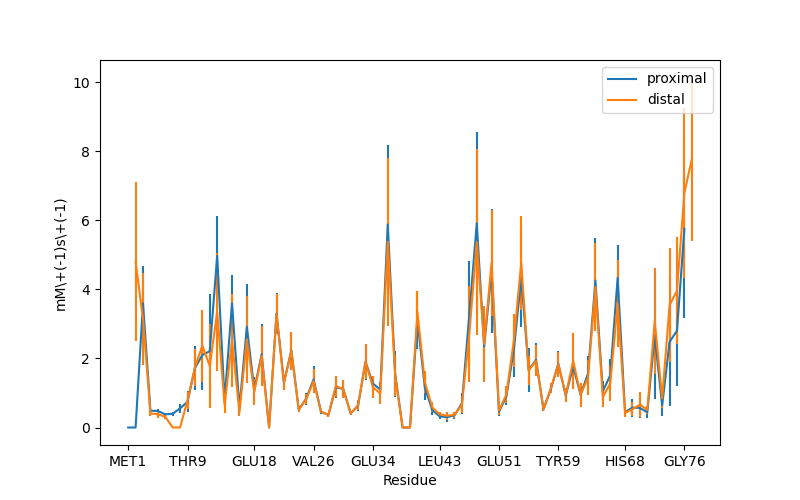

In [303]:
%matplotlib notebook

new_arrs = np.load("all_sPRE_arrays.npy")
means = np.mean(new_arrs, axis=1)
std = np.std(new_arrs, axis=1)

proximal_y = means[:76]
proximal_y_err = std[:76]
distal_y = means[76:]
distal_y_err = std[76:]


fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(np.arange(76), proximal_y, label='proximal')
ax.plot(np.arange(76) + 1, distal_y, label='distal')

for x, y, y_err in zip(np.arange(76), proximal_y, proximal_y_err):
    ax.errorbar(x, y, y_err, c='C0')
    
for x, y, y_err in zip(np.arange(76) + 1, distal_y, distal_y_err):
    ax.errorbar(x, y, y_err, c='C1')
        
xticks = np.arange(76)
numElems = 10
idx = np.round(np.linspace(0, len(xticks) - 1, numElems)).astype(int)
ax.set_xticks(xticks[idx])
ax.set_xticklabels(residue_names[idx])
ax.set_xlabel("Residue")
ax.set_ylabel("mM\+(-1)s\+(-1)")
ax.legend()

## Pyemma manual stuff

## Load Features

In [22]:
feats_dir = 'K6_features/'
os.makedirs(feats_dir, exist_ok=True)

# featurizer = em.Featurizer(trajs)
all_cartesians = AllCartesians(trajs.top[0])
print('all_cartesians:', len(all_cartesians.describe()))
central_cartesians = CentralCartesians(trajs.top[0])
print('central_cartesians:', len(central_cartesians.describe()))
central_dihedrals = CentralDihedrals(trajs.top[0])
print('central_dihedrals:', len(central_dihedrals.describe()))
central_angles = CentralAngles(trajs.top[0])
print('central_angles:', len(central_angles.describe()))
central_distances = CentralBondDistances(trajs.top[0])
print('central_distances:', len(central_distances.describe()))

all_cartesians: 4563
central_cartesians: 1368
central_dihedrals: 453
central_angles: 446
Selected central atoms:  456


Exception: Unkown amino acid in top.

In [10]:
trajs.top

[<mdtraj.Topology with 1 chains, 152 residues, 1521 atoms, 1518 bonds at 0x7f0977bccdd0>]

# Create a test diUbi that should work with pSolPot and RelaxRatioPot

In [18]:
def renumber_pdb_for_psolpot(file):
    with open(file, 'r') as f:
        lines = f.readlines()
    os.remove(file)
    new_lines = []
    increase = False
    for l in lines:
        if 'ATOM' in l:
            if increase:
                old_int = l[22:27]
                new_int = f"{int(l[22:27]) + 76:>4}"   ## Sure that this should be 75 and not 76?
                l = l.replace(old_int, new_int)
                new_lines.append(l)
            else:
                new_lines.append(l)
            if int(l[22:27]) >= 75 and 'O   GLY A' in l:
                increase = True
        elif 'TER    1506      GLY A  76' in l:
            l = 'TER    1506      GLY A 151\n'
            new_lines.append(l)
        else:
            new_lines.append(l)
    with open(file, 'w') as f:
        f.writelines(new_lines)

In [44]:
frame = trajs[0][0].traj

frame = frame.atom_slice(frame.top.select("not resname LYQ and not resname GLQ"))
frame.save_pdb('diUbi_pdb_offenders_removed.pdb')
renumber_pdb_for_psolpot('diUbi_pdb_offenders_removed.pdb')

# Find Andrejs Sims

In [26]:
sims_dir = '/home/andrejb/Research/SIMS/'
archive_dir = '/mnt/scc3/andrejb/ARCHIVE/simulations/'

In [5]:
def os_walk(dir_, resolution='aa'):
    traj_files = []
    pdb_files = []
    for root, dirs, files in os.walk(dir_, topdown=False):
        if 'preproc' in root or 'triUBQ' in root or 'tetraUBQ' in root:
            continue
        if 'k6' in root.lower() and not 'k63' in root.lower() and not 'monoub' in root.lower():
            for name in files:
                if name.endswith('xtc'):
                    if 'comp' in name:
                        found_file = os.path.join(root, name)
                        if check_ff(root, resolution=resolution):
                            traj_files.append(found_file)
                            pdb_files.append(os.path.join(root, 'confout.gro'))
                    elif 'nojump' in name:
                        found_file = os.path.join(root, name)
                        if check_ff(root, resolution=resolution):
                            traj_files.append(found_file)
                            pdb_files.append(os.path.join(root, 'start.pdb'))
                    elif name == 'traj.xtc':
                        pass
                    else:
                        print(name)
                        print(root)
                        print(os.listdir(root))
                        raise Exception("Unkown traj name.")
            for name in dirs:
                pass
    return traj_files, pdb_files
            
def check_ff(dir_, resolution='aa'):
    pdb_file = os.path.join(dir_, 'start.pdb')
    top_file = os.path.join(dir_, 'system.top')
    gro_file = os.path.join(dir_, 'confout.gro')
    if os.path.isfile(pdb_file):
        file = pdb_file
    elif os.path.isfile(top_file):
        file = top_file
    elif os.path.isfile(gro_file):
        file = gro_file
    else:
        print(dir_)
        print(os.listdir(dir_))
        raise Exception("Could not find start.pdb, system.top or confout.gro")
        
    with open(file, 'r') as f:
        line = f.readline()
        line2 = f.readline()
    if 'martini' in line.lower():
        out = False
    elif 'protein in water' in line.lower():
        out =  True
    elif 'top_G54A7' in line2:
        out =  True
    elif '[ defaults ]' in line:
        with open(file, 'r') as f:
            lines = f.read()
        if 'MARTINI' in lines:
            out =  False
        else:
            print(lines)
            raise Exception("Could not find system type in full topology file.")
    else:
        print(file)
        print(line)
        raise Exception("Unkonw system type")
        
    if resolution == 'cg':
        return not out
    return out
            
# sims_trajs, sims_pdbs = os_walk(sims_dir)
# archive_trajs, archive_pdbs = os_walk(archive_dir)

In [28]:
print(len(sims_trajs))
print(len(archive_trajs))

57
57


In [30]:
trajs = em.Info_all(sims_trajs, tops=sims_pdbs[0], common_str=['k6'])

# Load the CA coordinates without neighbors

In [29]:
from pyemma.coordinates.data.featurization.distances import DistanceFeature

In [68]:
trajs = em.Info_all(sims_trajs, tops=sims_pdbs[0], common_str=['k6'])
feat = pyemma.coordinates.featurizer(trajs[0].top)
feat.add_distances_ca(periodic=False)

In [77]:
out = pyemma.coordinates.load(trajs.traj_files, feat)
out = np.vstack(out)

In [2]:
# np.save("Ubi_K6_CA_pairwise_distances_57_trajs.npy", out)
CA_pairwise_neighbor_irgnored = np.load("Ubi_K6_CA_pairwise_distances_57_trajs.npy")

# Train EncoderMap

<IPython.core.display.Javascript object>


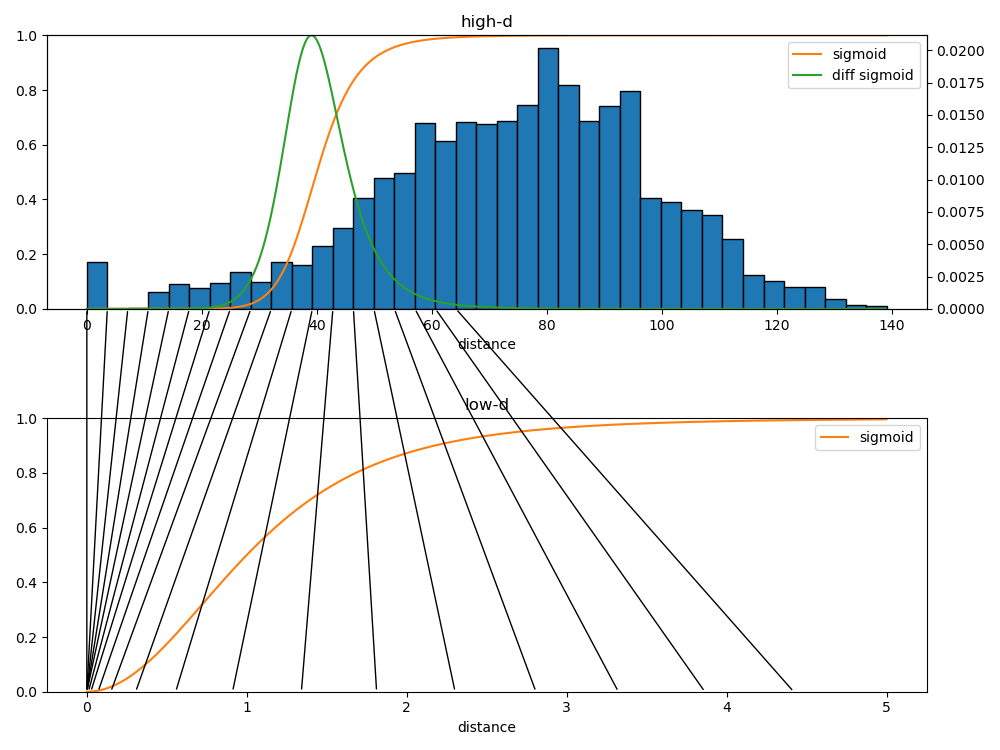

(<AxesSubplot:title={'center':'high-d'}, xlabel='distance'>,
 <AxesSubplot:label='9502950e-3474-4ddf-80d7-7cbda0de0329'>,
 <AxesSubplot:title={'center':'low-d'}, xlabel='distance'>)

In [4]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 7.5))
em.plot.distance_histogram(CA_pairwise_neighbor_irgnored[::1000], float('inf'), (40, 12, 10, 1, 2, 5), axes=ax)

In [5]:
em.Parameters.defaults

{'n_neurons': [128, 128, 2],
 'activation_functions': ['', 'tanh', 'tanh', ''],
 'periodicity': 6.283185307179586,
 'learning_rate': 0.001,
 'n_epochs': 20,
 'n_steps_per_epoch': 50,
 'batch_size': 256,
 'summary_step': 10,
 'checkpoint_step': 5000,
 'dist_sig_parameters': (4.5, 12, 6, 1, 2, 6),
 'distance_cost_scale': 500,
 'auto_cost_scale': 1,
 'auto_cost_variant': 'mean_abs',
 'center_cost_scale': 0.0001,
 'l2_reg_constant': 0.001,
 'gpu_memory_fraction': 0,
 'analysis_path': '',
 'id': '',
 'model_api': 'sequential',
 'loss': 'emap_cost',
 'training': 'auto',
 'batched': True,
 'tensorboard': False,
 'seed': None}

In [6]:
params = em.Parameters()
params.n_neurons = [500, 500, 500, 500, 5]
params.activation_functions = ['', 'tanh', 'tanh', 'tanh', 'tanh', '']
params.main_path = em.misc.run_path('runs/new_runs_57_trajs')
params.periodicity = float('inf')
params.tensorboard = True
params.n_epochs = 60
params.checkpoint_step = 5
params.dist_sig_parameters = (40, 12, 10, 1, 2, 5)
params.learning_rate = 0.00001

In [12]:
e_map = em.EncoderMap(params, CA_pairwise_neighbor_irgnored)
e_map.add_images_to_tensorboard(CA_pairwise_neighbor_irgnored[::10], image_step=2)

Output files are saved to runs/new_runs_57_trajs/run0 as defined in 'main_path' in the parameters.
Saved a text-summary of the model and an image in runs/new_runs_57_trajs/run0, as specified in 'main_pahth' in the parameters.
Logging images with (7616, 11175)-shaped data every 2 epochs to Tensorboard at runs/new_runs_57_trajs/run0


In [13]:
e_map.train()

100%|██████████| 3060/3060 [42:53<00:00,  1.19it/s, Loss after epoch 59=18.6]  


Saved current state of model at runs/new_runs_57_trajs/run0/saved_model_60.model_encoder and runs/new_runs_57_trajs/run0/saved_model_60.model_decoder.
Use em.EncoderMap.from_checkpoint('runs/new_runs_57_trajs/run0/saved_model_60.model*') to reload the current state of the two submodels.


In [17]:
lowd = e_map.encode(CA_pairwise_neighbor_irgnored)

<IPython.core.display.Javascript object>


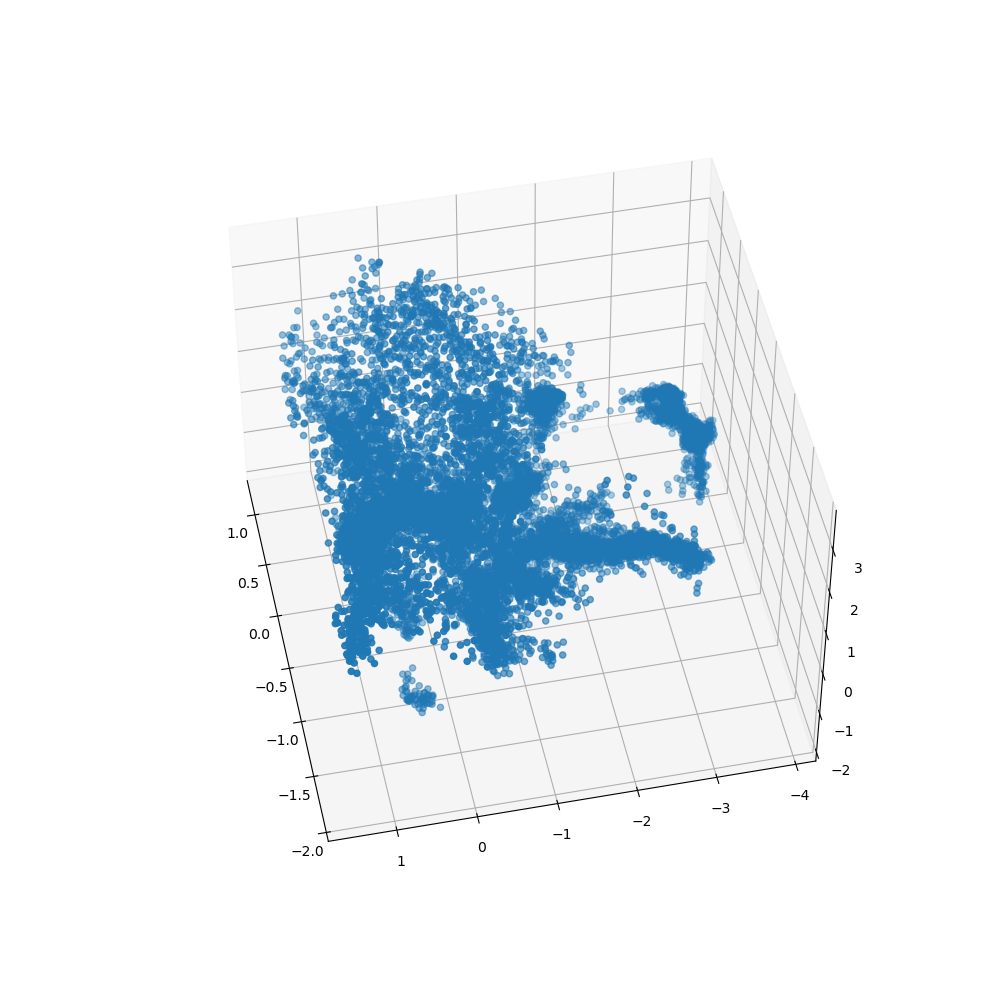

In [19]:
plt.close('all')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*lowd[::5,:3].T)

# Continue from here

## Clustering

In [20]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=250, cluster_selection_method='leaf').fit(lowd)

In [21]:
# np.save('clusterer_AA_all_sims_ignore_neighbors_labels.npy', clusterer.labels_)

In [22]:
np.unique(clusterer.labels_)
color_palette = sns.color_palette('deep', clusterer.labels_.max() + 1)
cluster_colors = [(*color_palette[x], 1) if x >= 0
                  else (0.5, 0.5, 0.5, 0.05)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

<IPython.core.display.Javascript object>


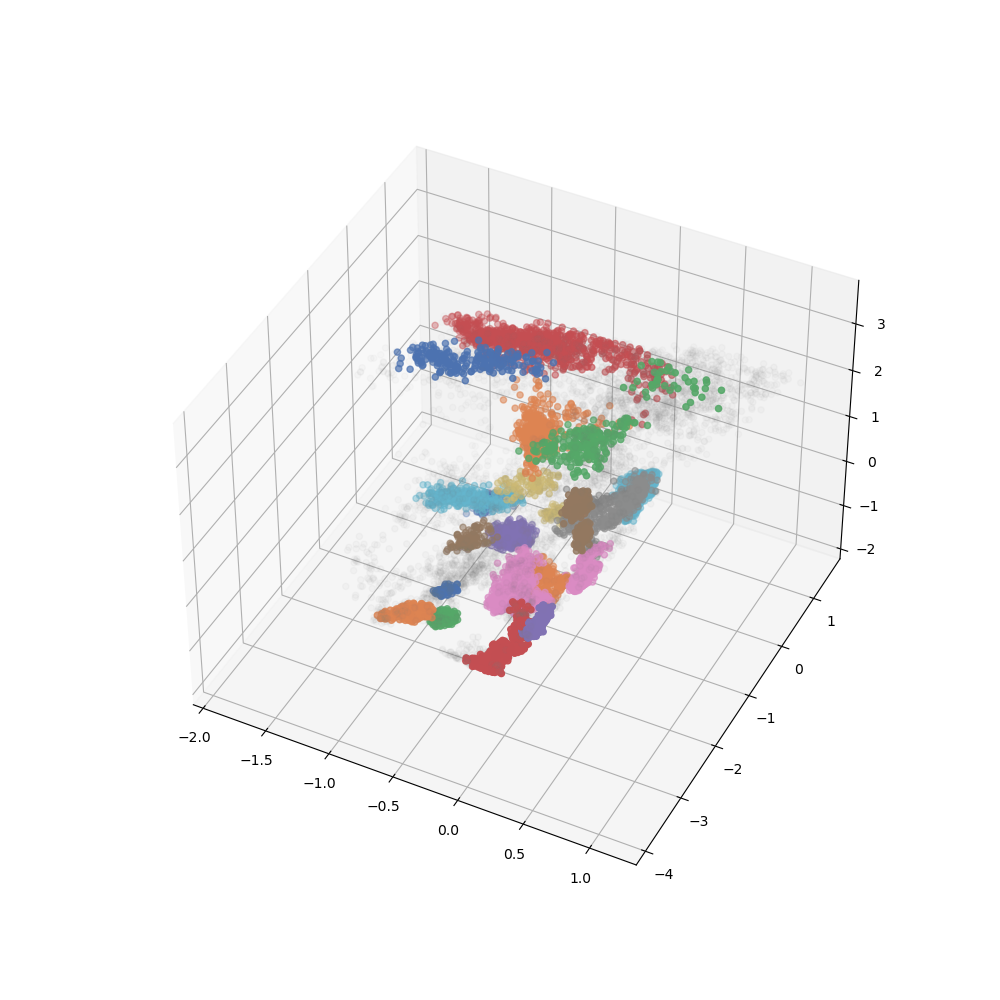

In [23]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*lowd[::5,:3].T, c=cluster_colors[::5])

In [32]:
trajs.load_CVs(clusterer.labels_, attr_name='cluster_membership')

## Find RMSD centroid for cluster

In [101]:
basedir = 'CA_distances_neighbor_excluded_all_trajs_clusters'
os.makedirs(basedir, exist_ok=True)

spre_file = '/home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl'
relax_pot_file = '/home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl'
temp = 300.0
freq = 600.0
nsteps = 1000
overwrite = True


for cluster_num in range(clusterer.labels_.max()):
    cluster_basedir = basedir + f'/{cluster_num}'
    os.makedirs(cluster_basedir, exist_ok=True)
    
    # some file definitions
    full_cluster_out = cluster_basedir + f'/cluster_{cluster_num}_rmsd_centroid_full.pdb'
    cluster_out_pdb = cluster_basedir + f'/cluster_{cluster_num}_rmsd_centroid.pdb'
    xplor_out_pdb = cluster_basedir + f'/cluster_{cluster_num}_rmsd_centroid_sim.pdb'
    if os.path.isfile(xplor_out_pdb) and not overwrite:
        print('already exists')
        continue
    
    
    _, dummy_traj = em.misc.clustering.gen_dummy_traj(trajs, cluster_num)
    index, distances, centroid = em.misc.clustering.rmsd_centroid_of_cluster(dummy_traj)
    centroid.save_pdb(full_cluster_out)
    centroid = centroid.atom_slice(centroid.top.select("not resname LYQ and not resname GLQ"))
    frame.save_pdb(cluster_out_pdb)
    renumber_pdb_for_psolpot(cluster_out_pdb)
    
    # run xplor NIH
    cmd = f'./run_psolpot_and_r_ratio_dyn.py -pdb {cluster_out_pdb} -psol_restraints {spre_file} -relax_restraints {relax_pot_file} -out_pdb {xplor_out_pdb} -temp {temp} -freq {freq} -nsteps {nsteps}'
    print(cmd)
    subprocess.call(cmd, shell=True)

/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/0/cluster_0_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/0/cluster_0_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/1/cluster_1_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/1/cluster_1_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/2/cluster_2_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/2/cluster_2_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/3/cluster_3_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/3/cluster_3_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/4/cluster_4_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/4/cluster_4_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/5/cluster_5_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/5/cluster_5_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/6/cluster_6_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/6/cluster_6_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/7/cluster_7_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/7/cluster_7_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/8/cluster_8_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/8/cluster_8_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/9/cluster_9_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/9/cluster_9_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/10/cluster_10_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/10/cluster_10_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/11/cluster_11_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/11/cluster_11_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/12/cluster_12_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/12/cluster_12_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/13/cluster_13_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/13/cluster_13_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/14/cluster_14_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/14/cluster_14_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/15/cluster_15_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/15/cluster_15_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/16/cluster_16_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/16/cluster_16_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/17/cluster_17_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/17/cluster_17_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/18/cluster_18_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/18/cluster_18_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/19/cluster_19_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/19/cluster_19_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/20/cluster_20_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/20/cluster_20_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int32)):
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY76-CA.
superposed


/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:257: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distances[i] = md.rmsd(traj, traj, i, atom_indices=atom_indices, parallel=parallel)


./run_psolpot_and_r_ratio_dyn.py -pdb CA_distances_neighbor_excluded_all_trajs_clusters/21/cluster_21_rmsd_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CA_distances_neighbor_excluded_all_trajs_clusters/21/cluster_21_rmsd_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 1000


In [102]:
print('fin?')

/home/kevin/.conda/envs/tf2_38/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


fin?


## Write XPLOR dynamics

In [218]:
# %%writefile run_psolpot_and_r_ratio_dyn.py
#!/home/kevin/software/xplor-nih/executables/pyXplor

import os, sys, re, glob, os, shutil, json, argparse
import numpy as np

class Capturing(list):
    """Class to capture print statements from function calls.

    Examples:
        >>> # write a function
        >>> def my_func(arg='argument'):
        ...     print(arg)
        ...     return('fin')
        >>> # use capturing context manager
        >>> with Capturing() as output:
        ...     my_func('new_argument')
        >>> print(output)
        ['new_argument', "'fin'"]

    """

    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self

    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio  # free up some memory
        sys.stdout = self._stdout

def output_json(calc_energy_in, file):
    with open(file, 'w') as f:
        f.write(calc_energy_in)

def run_dyn(pdb, psol_restraints, relax_restraints, out_pdb, temp, freq, nsteps):
    pdb_file = pdb
    txt_file = pdb.split('.')[0] + '.txt'
    
    print(f"running PSolPot on {pdb_file}. Dumping info into {txt_file}")
    
    import protocol
    
    # create psolpot
    radius = 1.4
    protocol.loadPDB(pdb_file, deleteUnknownAtoms=True)
    from psolPotTools import create_PSolPot
    psol = create_PSolPot("psol", file=psol_restraints)

    # psol options
    psol.setRmin(0.8)
    #psol.setRadMax(30.0)
    #psol.setThkIni(1.0)
    #psol.setThkFac(1.4)
    #psol.setTcType("fix")
    psol.setTauC(0.2)
    #psol.setPconc(4.0)
    psol.setSqn(3.5)
    psol.setRho0(0.24)
    psol.setScale(1.7)
    psol.setFreqI(freq)
    psol.tessellation().setVerbose(True)
    psol.setThreshold(0)
    psol.setProbeRadius(radius)
    psol.setRadiusOffset(radius)
    
    # old stuff
    # output_json(psol.info(), txt_file)
    # print(psol.calcEnergy())
    # values = []
    # for r in psol.restraints():
    #     values.append(r.calcd())
    # values = np.array(values)
    # np.save(npy_file, values)

    # create relaxpot
    from diffPotTools import readInRelaxData
    relax_data_in = readInRelaxData(relax_restraints, pattern=['resid', 'R1', 'R1_err', 'R2', 'R2_err', 'NOE', 'NOE_err'])
    from relaxRatioPotTools import create_RelaxRatioPot
    r_ratio = create_RelaxRatioPot('rrp', data_in=relax_data_in, freq=freq, temperature=temp)
    
    # dynamics in internal coordinates
    from ivm import IVM
    dyn = IVM()
    protocol.torsionTopology(dyn)
    protocol.initDynamics(dyn, bathTemp=temp, printInterval=1, numSteps=nsteps, potList=[psol, r_ratio])
    
    # run dyn
    dyn.run()
    
    # analyze
    # from simulationTools import analyze
    # output2 = analyze(dyn.info())
    # print('\n\n')
    # print(output2)
    # raise Exception("STOP")
    
    protocol.writePDB(out_pdb)


if __name__ == '__main__':
    parser = argparse.ArgumentParser(description="Run PsolPot using XPLOR-NIH python shell.")
    parser.add_argument('-pdb', metavar='<string>', required=True, type=str, help="The pdb file used to run PSolPot on.")
    parser.add_argument('-psol_restraints', metavar='<string>', required=True, type=str, help="Path to the restraints.tbl file for PSolPot.")
    parser.add_argument('-relax_restraints', metavar='<string>', required=True, type=str, help="Path to the restraints.tbl file dor RelaxRatioPot.")
    parser.add_argument('-out_pdb', metavar='<string>', required=True, type=str, help="Path for the pdb to be put out")
    parser.add_argument('-temp', metavar='<float>', required=True, type=float, help="Temperature of the experiment.")
    parser.add_argument('-freq', metavar='<float>', required=True, type=float, help="Frequency of the experiment.")
    parser.add_argument('-nsteps', metavar='<int>', required=True, type=int, help="How many steps to run for the simulations.")
    args = vars(parser.parse_args())
    run_dyn(**args)

Overwriting run_psolpot_and_r_ratio_dyn.py


## Get RMSD values

In [95]:
basedir = 'CA_distances_neighbor_excluded_all_trajs_clusters/'

rmsds = []

for cluster_num in os.listdir(basedir):
    if cluster_num == 'test':
        continue
    print(cluster_num)
    cluster_basedir = basedir + cluster_num + '/'
    cluster_num = int(cluster_num)
    
    # file definitions
    full_cluster_out = cluster_basedir + f'/cluster_{cluster_num}_rmsd_centroid_full.pdb'
    cluster_out_pdb = cluster_basedir + f'/cluster_{cluster_num}_rmsd_centroid.pdb'
    xplor_out_pdb = cluster_basedir + f'/cluster_{cluster_num}_rmsd_centroid_sim.pdb'
    
    # read trajs
    traj1 = md.load(cluster_out_pdb)
    traj2 = md.load(xplor_out_pdb)
    
    # indices
    ind1 = traj1.top.select('backbone')
    ind2 = traj2.top.select('backbone')
    traj1 = traj1.atom_slice(ind1)
    traj2 = traj2.atom_slice(ind2)
    
    # rmsd
    rmsd = md.rmsd(traj1, traj2)
    rmsds.append(rmsd)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [100]:
traj1 = md.load('CA_distances_neighbor_excluded_all_trajs_clusters/0/cluster_0_rmsd_centroid_full.pdb')
traj2 = md.load('CA_distances_neighbor_excluded_all_trajs_clusters/3/cluster_3_rmsd_centroid_full.pdb')
md.rmsd(traj1, traj2)

array([0.00056659], dtype=float32)

<IPython.core.display.Javascript object>


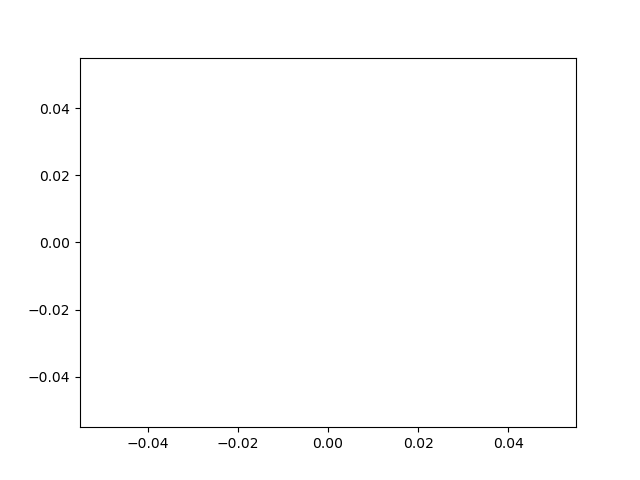

[]

In [91]:
plt.close('all')
plt.plot(xs=range(len(rmsds)), ys=rmsds)

# Render clusters with vmd

# Use all data with CGs

## Find the sims

In [30]:
sims_dir = '/home/andrejb/Research/SIMS/'

aa_trajs, aa_pdbs = os_walk(sims_dir)
cg_trajs, cg_pdbs = os_walk(sims_dir, resolution='cg')

## Define the CG distances without neighbor 2

In [5]:
for cg_traj, cg_pdb in zip(cg_trajs, cg_pdbs):
    traj = md.load(cg_traj, top=cg_pdb)
    print(traj)
    break
    
CG_indices = []
excluded_neighbors = 0
BB_indices = traj.top.select('name BB')
print(len(BB_indices))

assert isinstance(excluded_neighbors, int)
for i in range(len(BB_indices)):
    for j in range(i + 1, len(BB_indices)):
        # get ordered pair
        I = BB_indices[i]
        J = BB_indices[j]
        if (I > J):
            I = BB_indices[j]
            J = BB_indices[i]
        # exclude 1 and 2 neighbors
        if (J > I + excluded_neighbors):
            CG_indices.append([I, J])
CG_indices = np.array(CG_indices)
print(CG_indices.shape)

<mdtraj.Trajectory with 100001 frames, 326 atoms, 152 residues, and unitcells>
152
(11476, 2)


In [6]:
for aa_traj, aa_pdb in zip(aa_trajs, aa_pdbs):
    traj = md.load(aa_traj, top=aa_pdb)
    print(traj)
    break
    
AA_indices = []
excluded_neighbors = 0
CA_indices = traj.top.select('name CA')
print(len(CA_indices))

assert isinstance(excluded_neighbors, int)
for i in range(len(CA_indices)):
    for j in range(i + 1, len(CA_indices)):
        # get ordered pair
        I = CA_indices[i]
        J = CA_indices[j]
        if (I > J):
            I = CA_indices[j]
            J = CA_indices[i]
        # exclude 1 and 2 neighbors
        if (J > I + excluded_neighbors):
            AA_indices.append([I, J])
AA_indices = np.array(AA_indices)
print(AA_indices.shape)

<mdtraj.Trajectory with 5001 frames, 1521 atoms, 152 residues, and unitcells>
152
(11476, 2)


## Create xarray netCDF datasets

In [2]:
from pyemma.coordinates.data.featurization.distances import DistanceFeature
from pyemma.coordinates import featurizer
from encodermap.trajinfo.info_all import Capturing

In [8]:
basedir = 'AA_and_CG_pairwise_distances/'
os.makedirs(basedir, exist_ok=True)

for traj, pdb in zip(cg_trajs + aa_trajs, cg_pdbs + aa_pdbs):
    print(f"At traj {traj}")
    netcdf_file = basedir + traj.split('/')[-2] + '.h5'
    name = traj
    if traj in cg_trajs:
        indices = CG_indices
    else:
        indices = AA_indices
    if os.path.isfile(netcdf_file):
        print('already there')
        continue
    feat = DistanceFeature(top=md.load(pdb).topology, distance_indexes=indices, periodic=False)
    traj = md.load(traj, top=pdb)
    data = md.compute_distances(traj, indices, periodic=False)
    da = xr.DataArray(data,
                      coords={'frame_no': ('frame_no', np.arange(data.shape[0])),
                              'time': ('frame_no', traj.time),
                              'data': feat.describe()},
                      dims=['frame_no', 'data'],
                      name=cg_traj.split('/')[-2],
                      attrs={'length_units': 'nm', 'time_units': 'ps', 'angle_units': 'deg',
                             'full_path': cg_traj, 'topology_file': cg_pdb,
                             'feature_axis': 'data'})
    da.to_netcdf(netcdf_file, engine='h5netcdf', format='NETCDF4')
    del traj
    del data
    del da

At traj /home/andrejb/Research/SIMS/2016_08_09_2ub_k6_01/traj_nojump.xtc
At traj /home/andrejb/Research/SIMS/2016_08_09_2ub_k6_02/traj_nojump.xtc
At traj /home/andrejb/Research/SIMS/2016_11_26_2ub_k6_03/traj_nojump.xtc
At traj /home/andrejb/Research/SIMS/2016_11_26_2ub_k6_05/traj_nojump.xtc
At traj /home/andrejb/Research/SIMS/2016_11_26_2ub_k6_06/traj_nojump.xtc
At traj /home/andrejb/Research/SIMS/2017_07_21_2ub_k6_01_02/traj_nojump.xtc
At traj /home/andrejb/Research/SIMS/2017_07_21_2ub_k6_02_02/traj_nojump.xtc
At traj /home/andrejb/Research/SIMS/2017_08_01_2ub_k6_01_03/traj_nojump.xtc
At traj /home/andrejb/Research/SIMS/2017_08_01_2ub_k6_01_04/traj_nojump.xtc
At traj /home/andrejb/Research/SIMS/2017_08_01_2ub_k6_01_05/traj_nojump.xtc
At traj /home/andrejb/Research/SIMS/2017_08_01_2ub_k6_01_06/traj_nojump.xtc
At traj /home/andrejb/Research/SIMS/2017_08_01_2ub_k6_02_03/traj_nojump.xtc
At traj /home/andrejb/Research/SIMS/2017_08_01_2ub_k6_02_04/traj_nojump.xtc
At traj /home/andrejb/Resea

## Make Tensorflow generator out of them

In [4]:
highd_files = glob.glob('AA_and_CG_pairwise_distances/*.h5')

dataarrays = {}
values = []
for i, file in enumerate(highd_files):
    name = file.split('/')[-1].split('.')[0]
    da = xr.open_dataarray(file)
    if i == 0:
        test1 = da[{'frame_no': 0}].values
    if i == 1:
        test2 = da[{'frame_no': 0}].values
    n_frames = da.coords['frame_no'].values.max()
    if n_frames == 100000:
        print(f"{name} is cg")
        da = da[{'frame_no': slice(None, None, 10)}]
    else:
        print(f"{name} is aa with {n_frames} frames.")
    da.coords['data'] = np.arange(11476)
    values.append(da.values)
    # dataarrays[name] = da

2016_08_09_2ub_k6_01 is cg
2016_08_09_2ub_k6_02 is cg
2016_11_26_2ub_k6_03 is cg
2016_11_26_2ub_k6_04 is cg
2016_11_26_2ub_k6_05 is cg
2016_11_26_2ub_k6_06 is cg
2017_07_21_2ub_k6_01_02 is cg
2017_07_21_2ub_k6_02_02 is cg
2017_08_01_2ub_k6_01_03 is cg
2017_08_01_2ub_k6_01_04 is cg
2017_08_01_2ub_k6_01_05 is cg
2017_08_01_2ub_k6_01_06 is cg
2017_08_01_2ub_k6_02_03 is cg
2017_08_01_2ub_k6_02_04 is cg
2017_08_01_2ub_k6_02_05 is cg
2017_08_01_2ub_k6_02_06 is cg
2019_02_22_2ub_k6_01_07 is cg
2019_02_22_2ub_k6_01_08 is cg
2019_02_22_2ub_k6_01_09 is cg
2019_02_22_2ub_k6_01_10 is cg
2019_02_22_2ub_k6_02_07 is cg
2019_02_22_2ub_k6_02_08 is cg
2019_02_22_2ub_k6_02_09 is cg
2019_02_22_2ub_k6_02_10 is cg
2017_04_27_G_2ub_k6_01_01 is aa with 5000 frames.
2017_04_27_G_2ub_k6_01_02 is aa with 5000 frames.
2017_04_27_G_2ub_k6_01_03 is aa with 5000 frames.
2017_04_27_G_2ub_k6_01_04 is aa with 5000 frames.
2017_04_27_G_2ub_k6_01_05 is aa with 5000 frames.
2017_04_27_G_2ub_k6_01_06 is aa with 5000 frames

In [39]:
assert not np.array_equal(test1, test2)

In [ ]:
dataset = xr.Dataset(dataarrays)

In [ ]:
dataset

In [24]:
dataset

<xarray.Dataset>
Dimensions:               (data: 11476, frame_no: 301)
Coordinates:
  * data                  (data) int64 0 1 2 3 4 ... 11472 11473 11474 11475
  * frame_no              (frame_no) int64 0 1 2 3 4 5 ... 296 297 298 299 300
    time                  (frame_no) float32 ...
Data variables:
    2016_08_09_2ub_k6_01  (frame_no, data) float32 ...

In [8]:
full_dataset = xr.concat(datasets, 'frame_no')

In [2]:
# full_dataset.to_netcdf('full_CA_distances_CG_sliced_10.h5', engine='h5netcdf', format='NETCDF4')
full_dataset = xr.open_dataset('full_CA_distances_CG_sliced_10.h5')

**Find local maxima in time array to get a rough estimate of the total time.**

In [3]:
a = full_dataset.coords['time'].values

In [4]:
a[np.r_[True, a[1:] > a[:-1]] & np.r_[a[:-1] > a[1:], True]].sum() / 1000 / 1000

240.760992

In [5]:
import xbatcher

In [6]:
def prepare_generator(dataset):
    def generator():
        bgen = xbatcher.BatchGenerator(dataset, {'frame_no': 256})
        for batch in bgen:
            out = batch.to_array().values.squeeze()
            yield (out, out)
    return generator

In [7]:
gen = prepare_generator(full_dataset)

In [8]:
import time
def benchmark(dataset, num_epochs=2):
    start_time = time.perf_counter()
    for epoch_num in range(num_epochs):
        for sample in dataset:
            # Performing a training step
            time.sleep(0.01)
    print("Execution time:", time.perf_counter() - start_time)

In [8]:
dataset = tf.data.Dataset.from_generator(gen, ('float32', 'float32'), output_shapes=((256, 11476), (256, 11476)))
dataset = dataset.shuffle(buffer_size=10000, reshuffle_each_iteration=True)
dataset = dataset.repeat()

In [9]:
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
# dataset = dataset.interleave(lambda _: dataset, num_parallel_calls=tf.data.experimental.AUTOTUNE)

## Train e_map

In [5]:
data = np.vstack(values)

In [12]:
params = em.Parameters()
params.n_neurons = [500, 500, 500, 500, 5]
params.activation_functions = ['', 'tanh', 'tanh', 'tanh', 'tanh', '']
params.main_path = em.misc.run_path('runs/all_data/')
params.periodicity = float('inf')
params.tensorboard = True
params.n_epochs = 100
params.checkpoint_step = 5
params.dist_sig_parameters = (40, 12, 10, 1, 2, 5)
params.learning_rate = 0.00001

In [7]:
# data = full_dataset[{'frame_no': slice(None, None, 100)}].to_array().values.squeeze()
# data = full_dataset['2016_08_09_2ub_k6_01'].values()
print(data.shape)

(316181, 11476)


In [18]:
# e_map = em.EncoderMap(params, data)
e_map.add_images_to_tensorboard(data[::100], 1)

Logging images with (3162, 11476)-shaped data every 1 epochs to Tensorboard at runs/all_data/run6


In [19]:
e_map.train()

  6%|▌         | 306/5100 [10:20<2:21:08,  1.77s/it, Loss after epoch 5=21.3]

saving


 11%|█         | 561/5100 [17:41<2:14:10,  1.77s/it, Loss after epoch 10=18.7]

saving


 16%|█▌        | 816/5100 [25:03<1:56:44,  1.64s/it, Loss after epoch 15=17.7]

saving


 21%|██        | 1071/5100 [32:25<2:05:34,  1.87s/it, Loss after epoch 20=16.9]

saving


 26%|██▌       | 1326/5100 [39:50<1:38:40,  1.57s/it, Loss after epoch 25=16.4]

saving


 31%|███       | 1581/5100 [47:06<1:40:53,  1.72s/it, Loss after epoch 30=15.1]

saving


 36%|███▌      | 1836/5100 [54:35<1:34:11,  1.73s/it, Loss after epoch 35=15]  

saving


 41%|████      | 2091/5100 [1:02:02<1:26:00,  1.72s/it, Loss after epoch 40=13.7]

saving


 46%|████▌     | 2346/5100 [1:09:32<1:22:36,  1.80s/it, Loss after epoch 45=13.6]

saving


 51%|█████     | 2601/5100 [1:16:58<1:09:45,  1.67s/it, Loss after epoch 50=12.8]

saving


 56%|█████▌    | 2856/5100 [1:24:09<1:07:22,  1.80s/it, Loss after epoch 55=11.8]

saving


 61%|██████    | 3111/5100 [1:31:32<58:29,  1.76s/it, Loss after epoch 60=11.7]  

saving


 66%|██████▌   | 3366/5100 [1:39:03<48:33,  1.68s/it, Loss after epoch 65=10.9]  

saving


 71%|███████   | 3621/5100 [1:46:26<40:55,  1.66s/it, Loss after epoch 70=10.7]  

saving


 76%|███████▌  | 3876/5100 [1:53:52<35:33,  1.74s/it, Loss after epoch 75=10.3]  

saving


 81%|████████  | 4131/5100 [2:01:15<28:15,  1.75s/it, Loss after epoch 80=10.2]

saving


 86%|████████▌ | 4386/5100 [2:08:43<22:03,  1.85s/it, Loss after epoch 85=9.93]

saving


 91%|█████████ | 4641/5100 [2:16:07<13:10,  1.72s/it, Loss after epoch 90=9.15]

saving


 96%|█████████▌| 4896/5100 [2:23:28<05:52,  1.73s/it, Loss after epoch 95=9.45]

saving


100%|██████████| 5100/5100 [2:29:24<00:00,  1.76s/it, Loss after epoch 99=8.49]


In [20]:
e_map.save()

Saved current state of model.
Use em.EncoderMap.from_checkpoint('runs/all_data/run6/saved_model_2021-04-07_05-46-02.model*') to reload the current state of the two submodels.


In [23]:
lowd = e_map.encode(data[::10])

<IPython.core.display.Javascript object>


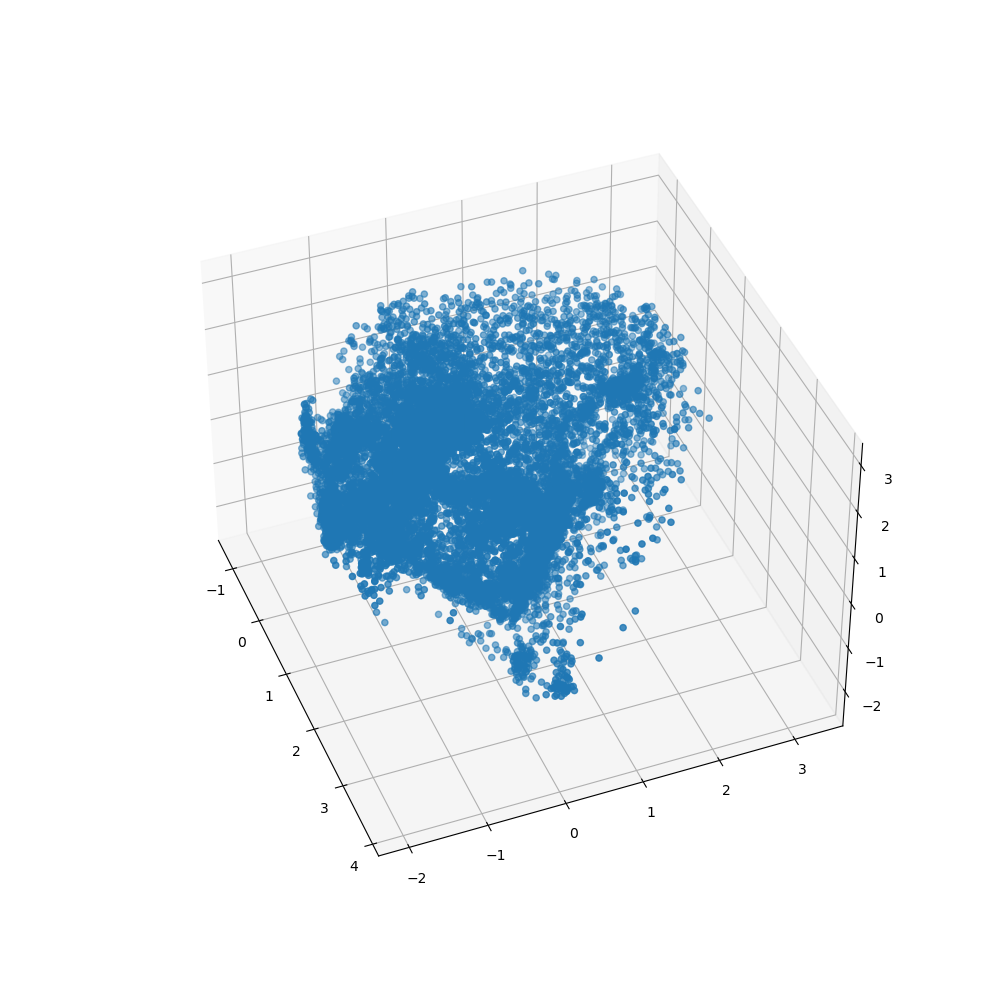

In [29]:
plt.close('all')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*lowd[:,:3].T)

In [31]:
loaded_e_map = em.EncoderMap.from_checkpoint('runs/all_data/run6/saved_model_2021-04-07_05-46-02.model*', read_only=False)

Output files are saved to runs/all_data/run6 as defined in 'main_path' in the parameters.
Saved a text-summary of the model and an image in runs/all_data/run6, as specified in 'main_path' in the parameters.
rebuilding Model with input_dim = 11476


<IPython.core.display.Javascript object>


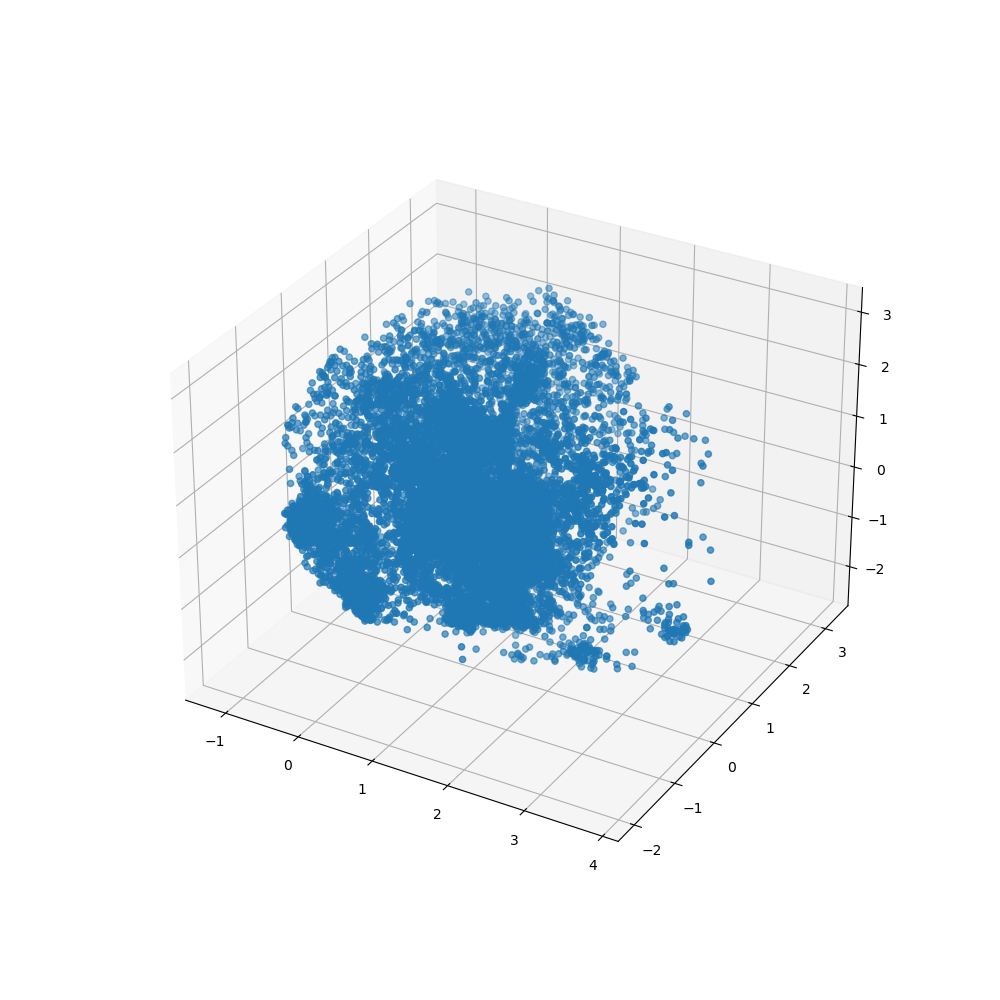

In [32]:
plt.close('all')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*loaded_e_map.encode(data[::10])[:,:3].T)

## Short test clustering before killing the notebook

In [54]:
highd = xr.load_dataarray('AA_and_CG_pairwise_distances/2017_06_28_GfM_SMmin_k6_0.h5')
traj_file = '/home/andrejb/Research/SIMS/2017_06_28_GfM_SMmin_k6_0/traj_nojump.xtc'
top_file = '/home/andrejb/Research/SIMS/2017_06_28_GfM_SMmin_k6_0/start.pdb'
trajs = em.Info_all([traj_file], [top_file])

In [35]:
lowd = loaded_e_map.encode(highd)

<IPython.core.display.Javascript object>


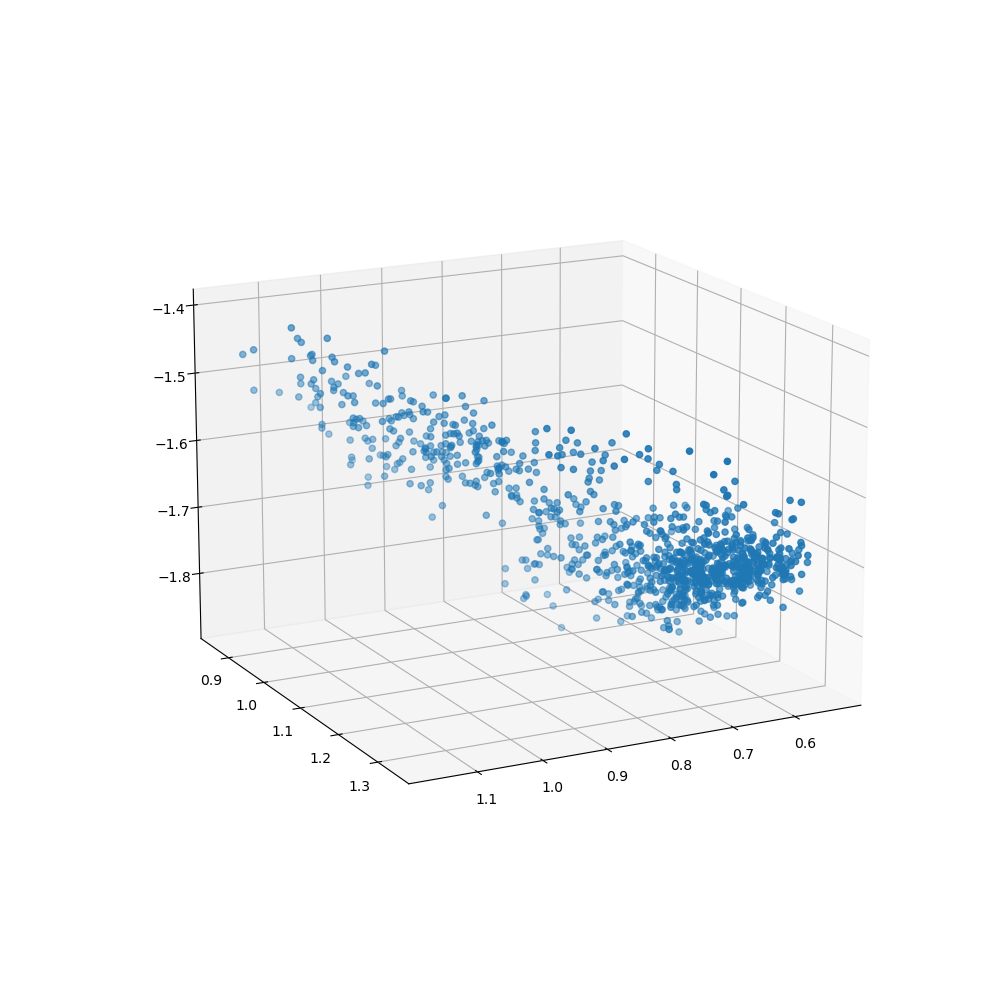

In [36]:
plt.close('all')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*lowd[:,:3].T)

In [42]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=25, cluster_selection_method='leaf').fit(lowd)

<IPython.core.display.Javascript object>


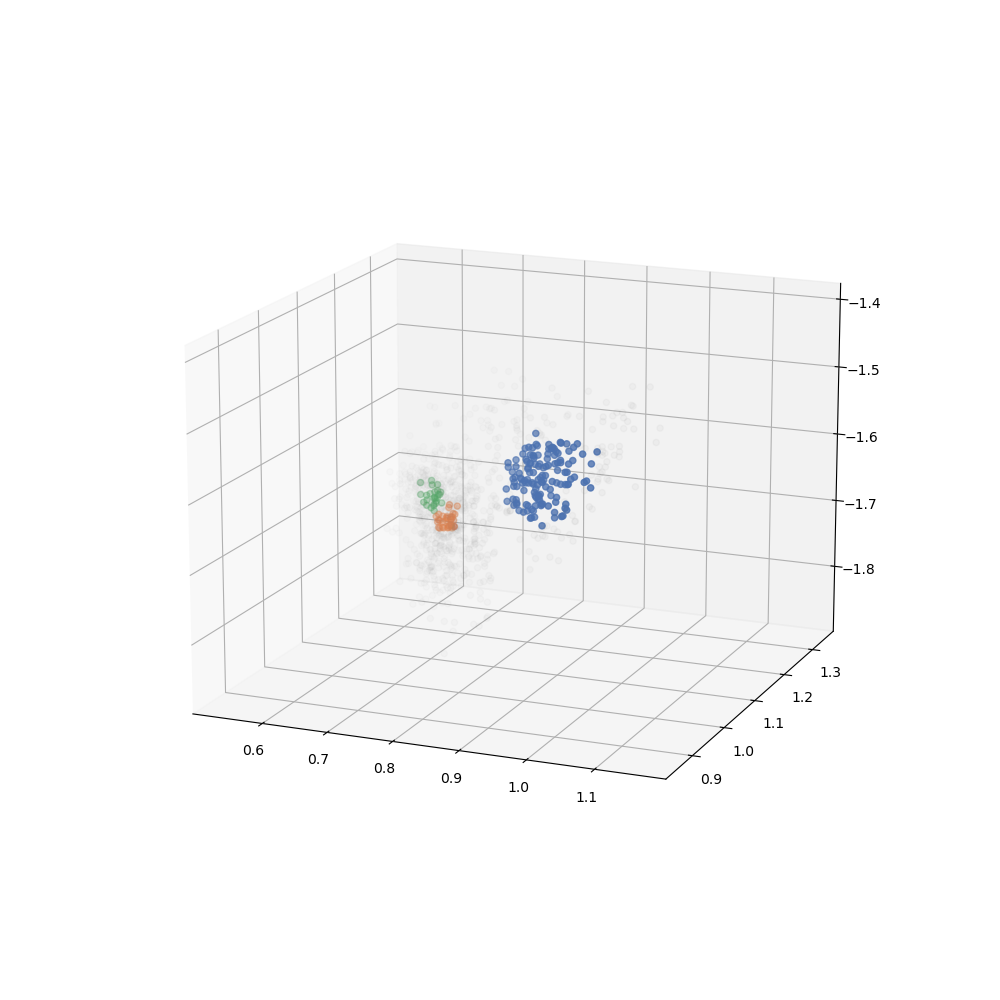

In [43]:
color_palette = sns.color_palette('deep', clusterer.labels_.max() + 1)
cluster_colors = [(*color_palette[x], 1) if x >= 0
                  else (0.5, 0.5, 0.5, 0.05)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*lowd[:,:3].T, c=cluster_colors)

In [56]:
trajs.load_CVs(np.expand_dims(clusterer.labels_, attr_name='cluster_membership')

In [70]:
where = np.where(trajs._CVs['cluster_membership'].values.squeeze() == 0)[0]

In [76]:
view, dummy_traj = em.misc.clustering.gen_dummy_traj(trajs, [where], nglview=True, stack_atoms=True, shorten=True)

/home/kevin/.conda/envs/tf2_38/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/kevin/projects/encoder_map_private/encodermap/misc/clustering.py:82: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(cluster_no, (int, np.int, np.int64, np.int3

Provided alignment string results in 152 atoms. First atom is MET1-CA. Last atom is GLY152-CA.
superposed


In [78]:
dummy_traj[0].save_pdb('tmp.pdb')

## Project all data

In [2]:
loaded_e_map = em.EncoderMap.from_checkpoint('runs/all_data/run6/saved_model_2021-04-07_05-46-02.model*', read_only=False)

Output files are saved to runs/all_data/run6 as defined in 'main_path' in the parameters.
Saved a text-summary of the model and an image in runs/all_data/run6, as specified in 'main_path' in the parameters.
rebuilding Model with input_dim = 11476


In [3]:
highd_files = glob.glob('AA_and_CG_pairwise_distances/*.h5')

values = []
for i, file in enumerate(highd_files):
    basename = file.split('/')[-1].split('.')[0]
    print(basename)
    data = xr.load_dataarray(file).values
    lowd = loaded_e_map.encode(data)
    del data
    np.save('AA_and_CG_pairwise_distances/' + basename + '.npy', lowd)
    values.append(lowd)

2016_08_09_2ub_k6_01
2016_08_09_2ub_k6_02
2016_11_26_2ub_k6_03
2016_11_26_2ub_k6_04
2016_11_26_2ub_k6_05
2016_11_26_2ub_k6_06
2017_07_21_2ub_k6_01_02
2017_07_21_2ub_k6_02_02
2017_08_01_2ub_k6_01_03
2017_08_01_2ub_k6_01_04
2017_08_01_2ub_k6_01_05
2017_08_01_2ub_k6_01_06
2017_08_01_2ub_k6_02_03
2017_08_01_2ub_k6_02_04
2017_08_01_2ub_k6_02_05
2017_08_01_2ub_k6_02_06
2019_02_22_2ub_k6_01_07
2019_02_22_2ub_k6_01_08
2019_02_22_2ub_k6_01_09
2019_02_22_2ub_k6_01_10
2019_02_22_2ub_k6_02_07
2019_02_22_2ub_k6_02_08
2019_02_22_2ub_k6_02_09
2019_02_22_2ub_k6_02_10
2017_04_27_G_2ub_k6_01_01
2017_04_27_G_2ub_k6_01_02
2017_04_27_G_2ub_k6_01_03
2017_04_27_G_2ub_k6_01_04
2017_04_27_G_2ub_k6_01_05
2017_04_27_G_2ub_k6_01_06
2017_04_27_G_2ub_k6_02_01
2017_04_27_G_2ub_k6_02_02
2017_04_27_G_2ub_k6_02_03
2017_04_27_G_2ub_k6_02_04
2017_04_27_G_2ub_k6_02_05
2017_04_27_G_2ub_k6_02_06
2017_06_09_GfM_SMmin_2ub_k6_01
2017_06_28_GfM_SMmin_k6_0
2017_06_28_GfM_SMmin_k6_1
2017_06_28_GfM_SMmin_k6_2
2017_06_28_GfM_SMmin_

## Cluster all data

In [4]:
lowd = np.vstack(values)

(2476181, 5)


<IPython.core.display.Javascript object>


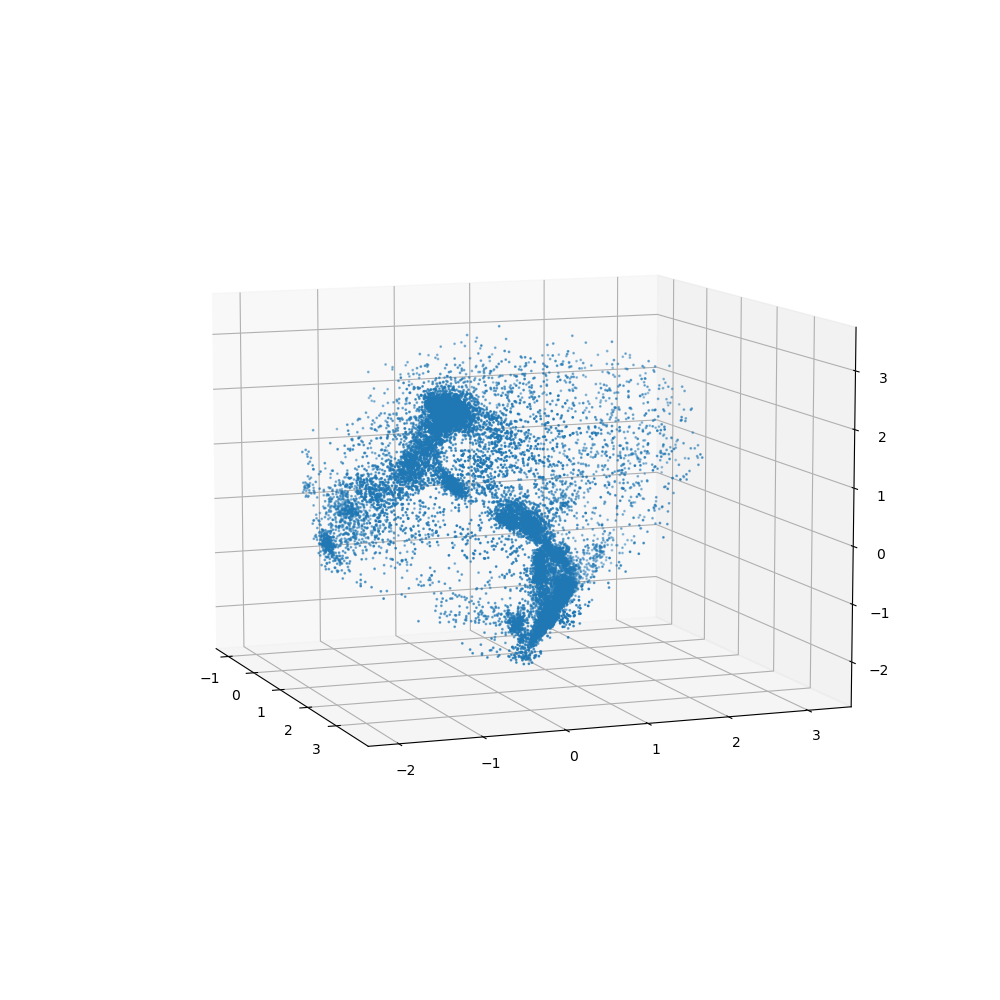

In [12]:
plt.close('all')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*lowd[::100,:3].T, s=1)

<IPython.core.display.Javascript object>


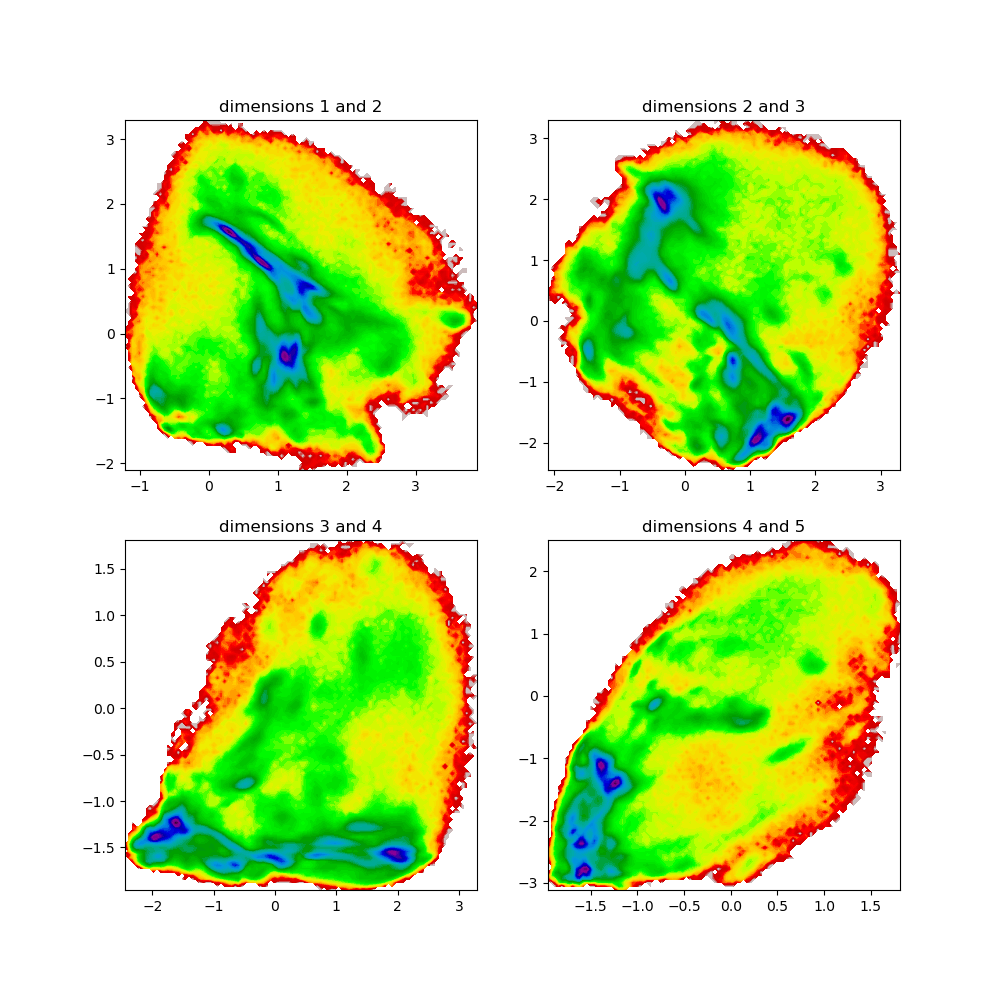

Text(0.5, 1.0, 'dimensions 4 and 5')

In [28]:
plt.close('all')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
pyemma.plots.plot_free_energy(*lowd[:,0:2].T, ax=ax1, cbar=False)
ax1.set_title('dimensions 1 and 2')
pyemma.plots.plot_free_energy(*lowd[:,1:3].T, ax=ax2, cbar=False)
ax2.set_title('dimensions 2 and 3')
pyemma.plots.plot_free_energy(*lowd[:,2:4].T, ax=ax3, cbar=False)
ax3.set_title('dimensions 3 and 4')
pyemma.plots.plot_free_energy(*lowd[:,3:5].T, ax=ax4, cbar=False)
ax4.set_title('dimensions 4 and 5')

In [13]:
# clusterer = hdbscan.HDBSCAN(min_cluster_size=500, cluster_selection_method='leaf').fit(lowd)

In [4]:
# np.save('clusterer_AA_and_CG_labels.npy', clusterer.labels_)
class Clusterer:
    pass
clusterer = Clusterer
clusterer.labels_ = np.load('clusterer_AA_and_CG_labels.npy')

<IPython.core.display.Javascript object>


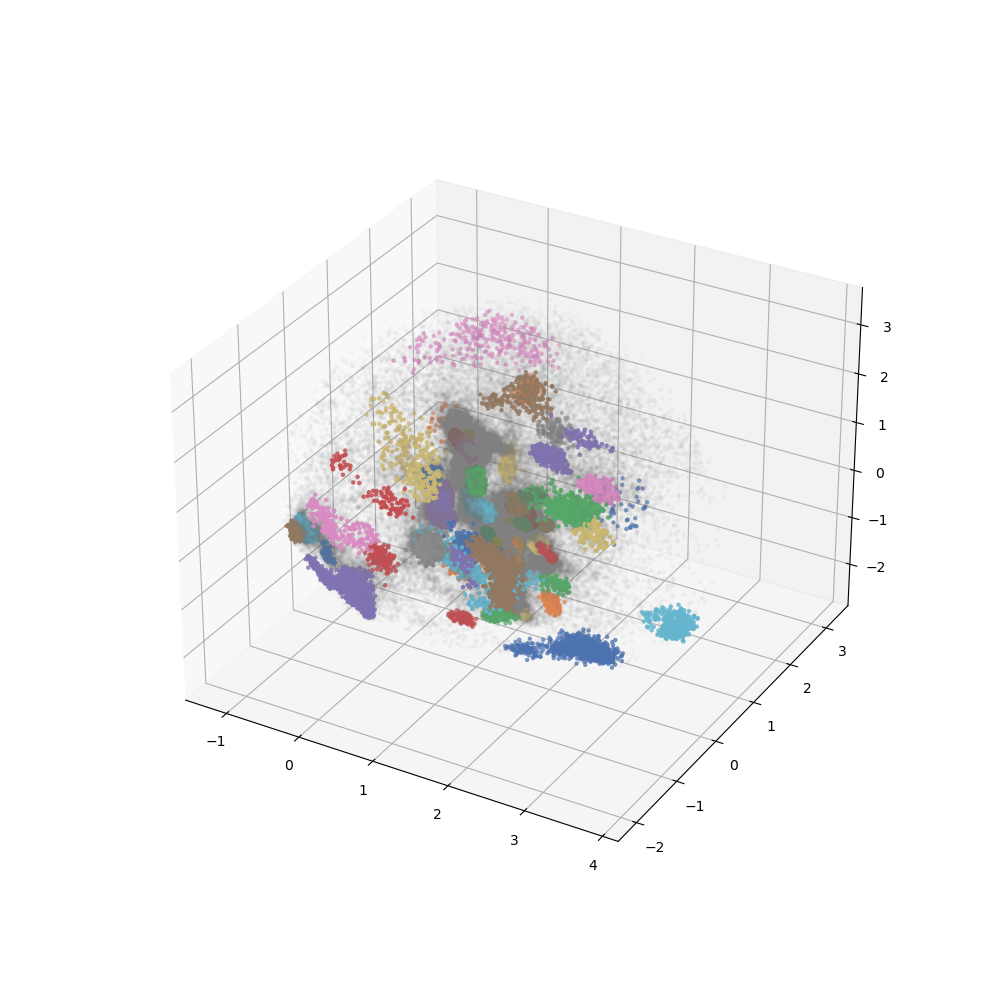

In [18]:
color_palette = sns.color_palette('deep', clusterer.labels_.max() + 1)
cluster_colors = [(*color_palette[x], 1) if x >= 0
                  else (0.5, 0.5, 0.5, 0.05)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*lowd[::10,:3].T, c=cluster_colors[::10], s=5)

## Assign clusters

In [6]:
sims_dir = '/home/andrejb/Research/SIMS/'

aa_trajs, aa_pdbs = os_walk(sims_dir)
cg_trajs, cg_pdbs = os_walk(sims_dir, resolution='cg')

In [57]:
trajs = []
for traj_file, top_file in zip(cg_trajs + aa_trajs, cg_pdbs + aa_pdbs):
    trajs.append(em.Info_single(traj_file, top_file))
trajs = em.Info_all(trajs)

In [58]:
for traj in trajs:
    new_basename = traj.traj_file.split('/')[-2]
    lowd_file = f'AA_and_CG_pairwise_distances/{new_basename}.npy'
    traj.load_CV(lowd_file, 'lowd')

In [59]:
from encodermap.misc.xarray import add_one_by_one
splits = add_one_by_one([traj.lowd.shape[1] for traj in trajs])[:-1]
splitted_cluster_labels = np.split(clusterer.labels_, splits)
print(len(splitted_cluster_labels), trajs.n_trajs)
assert all([trajs[i].lowd.shape[1] == len(splitted_cluster_labels[i]) for i in range(trajs.n_trajs)])
for i, traj in enumerate(trajs):
    traj.load_CV(splitted_cluster_labels[i], 'cluster_membership')

81 81


In [60]:
trajs

<encodermap.Info_all object. Current backend is no_load. Containing 81 trajs. CV cluster_membership with shape (2476181,) loaded. CV lowd with shape (2476181, 5) loaded. Object at 0x7fb637b4ad90>

In [15]:
trajs.cluster_membership

array([ 6,  6, -1, ..., -1, -1, -1])

## Run XPLOR-NIH

In [100]:
def backmap(cg_structure, aa_structure, path_em, aa_topology='/home/kevin/git/Backward/examples/UBQ_martini/2xUBQ_aa.top'):
    aa_structure_before_editconf = aa_structure.replace('.gro', '_for_editconf.gro')
    aa_structure_raw = aa_structure.replace('.gro', '_raw.gro')
    args = '-f {} -p {} -o {} -to gromos -kick 0.05'.format(cg_structure, aa_topology, aa_structure_raw)
    args_list = args.split()
    if not os.path.isfile(aa_structure_raw):
        backward.workflow(args_list)
    else:
        print(f"{aa_structure_raw} already exists.")
    
    rabbit              = rr.Rabbit(ff="gromos54a7", template_name="backmap_em_bfgs")
    rabbit.structure    = aa_structure_raw
    rabbit.topology     = aa_topology
    rabbit.destination  = path_em
    # make all necessary run files like .mdp
    rabbit.run()
    
    cwd = os.getcwd()
    os.chdir(path_em)
    
    if not os.path.isfile('eq5.gro'):
        # run energy minimization and equilibration
        subprocess.call('bash setup', shell=True)
        # !cd {path_em} && bash setup
    else:
        print('eq5.gro already exists.')
        
    time.sleep(2)
    
    os.chdir(cwd)
    # copy final structure
    shutil.copyfile(f'{path_em}/eq5.gro', aa_structure_before_editconf)
    assert os.path.isfile(aa_structure_before_editconf)
    # !cp {path_em}/eq5.gro {aa_structure}
    
    # note: some atoms are not in the first unit cell after mackmapping
    # resolve by:
    cmd = f'gmx editconf -f {aa_structure_before_editconf} -o {aa_structure} -pbc yes'
    process = subprocess.Popen(cmd, stderr=subprocess.PIPE, stdout=subprocess.PIPE, shell=True)
    out, err = process.communicate()
    return_code = process.poll()
    out = out.decode(sys.stdin.encoding)
    err = err.decode(sys.stdin.encoding)
    if not os.path.isfile(aa_structure):
        print(out)
        print(err)
        raise Exception(f"{aa_structure} nor produced")
    # !gmx editconf -f {aa_structure_before_editconf} -o {aa_structure} -pbc yes
    
def prepare_pdb_for_backmap(pdb_file, with_atom_renumber=False):
    with open(pdb_file, 'r') as f:
        lines = f.read().splitlines()
    new_lines = []
    for line in lines:
        if not 'ATOM' in line:
            if 'TER' in line:
                continue
            else:
                new_lines.append(line)
                continue
        if 'GLQ' in line:
            line = line.replace('GLQ', 'GLY')
        if 'LYQ' in line:
            line = line.replace('LYQ', 'LYS')
        atom_num = line[8:11]
        new_atom_num = f"{int(atom_num) - 1:>3}"
        seqnum = line[23:26]
        new_seqnum = f"{int(seqnum) - 1:>3}"
        line = line.replace(seqnum, new_seqnum)
        if with_atom_renumber:
            line = line.replace(atom_num, new_atom_num)
        line = line.replace(' A ', ' s ')
        line = line.replace('     B', 'seg_ B')
        line = line.replace('     S', 'seg_ S')
        if 'ATOM      0  BB  MET s   0' in line:
            print('found')
            line = line.replace('ATOM      0  BB  MET s   0', 'ATOM      1  BB  MET s   0')
        new_lines.append(line)
    with open(pdb_file, 'w') as f:
        f.write('\n'.join(new_lines))

In [78]:
process = subprocess.Popen('gmx editconf -h', stderr=subprocess.PIPE, stdout=subprocess.PIPE, shell=True)
out, err = process.communicate()
return_code = process.poll()
out = out.decode(sys.stdin.encoding)
err = err.decode(sys.stdin.encoding)

print(out, err)

SYNOPSIS

gmx editconf [-f [<.gro/.g96/...>]] [-n [<.ndx>]] [-bf [<.dat>]]
             [-o [<.gro/.g96/...>]] [-mead [<.pqr>]] [-[no]w] [-[no]ndef]
             [-bt <enum>] [-box <vector>] [-angles <vector>] [-d <real>]
             [-[no]c] [-center <vector>] [-aligncenter <vector>]
             [-align <vector>] [-translate <vector>] [-rotate <vector>]
             [-[no]princ] [-scale <vector>] [-density <real>] [-[no]pbc]
             [-resnr <int>] [-[no]grasp] [-rvdw <real>] [-[no]sig56]
             [-[no]vdwread] [-[no]atom] [-[no]legend] [-label <string>]
             [-[no]conect]

DESCRIPTION

gmx editconf converts generic structure format to .gro, .g96 or .pdb.

The box can be modified with options -box, -d and -angles. Both -box and -d
will center the system in the box, unless -noc is used. The -center option can
be used to shift the geometric center of the system from the default of (x/2,
y/2, z/2) implied by -c to some other value.

Option -bt determines the box type: 

In [111]:
basedir = 'CG_CA_clusters/'
os.makedirs(basedir, exist_ok=True)

# XPLOR
relax_pot_file = '/home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl'
spre_file = '/home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl'
temp = 300.0
freq = 600.0
nsteps = 500
overwrite = True

# Some lists with basenames
cg_basenames = list(map(lambda x: x.split('/')[-2], cg_trajs))
aa_basenames = list(map(lambda x: x.split('/')[-2], aa_trajs))

# traj that has worked with XPLOR:
working_traj = md.load('CA_distances_neighbor_excluded_all_trajs_clusters/0/cluster_0_rmsd_centroid_full.pdb')

# basenames of trajs with same length as cluster_membership
name_arr = []
for traj in trajs:
    name_arr.extend([traj.traj_file.split('/')[-2] for i in range(len(traj.cluster_membership))])
name_arr = np.array(name_arr)

for cluster_num in range(clusterer.labels_.max()):
    cluster_basedir = basedir + f'{cluster_num}'
    os.makedirs(cluster_basedir, exist_ok=True)
    
    # some file definitions
    full_cluster_out = cluster_basedir + f'/cluster_{cluster_num}_cart_centroid_full.pdb'
    cluster_out_pdb = cluster_basedir + f'/cluster_{cluster_num}_cart_centroid.pdb'
    xplor_out_pdb = cluster_basedir + f'/cluster_{cluster_num}_cart_centroid_sim.pdb'
    if os.path.isfile(xplor_out_pdb) or not overwrite:
        print('already exists')
        continue
    
    # euclidean center
    where = np.where(trajs.cluster_membership == cluster_num)[0]
    cluster_points = trajs.lowd[where]
    cart_centroid = np.mean(cluster_points, axis=0)
    dists = np.sum((cluster_points - cart_centroid)**2, axis=1)
    clostest_point_index = np.argmin(dists)
    
    # find the frame of the closest point
    if not os.path.isfile(cluster_out_pdb) or overwrite:
        
        # iterate over trajs(frames) until index is met
        index = where[clostest_point_index]
        current = 0
        for traj in trajs:
            if len(traj.cluster_membership) + current < index:
                current += len(traj.cluster_membership)
                continue
            else:
                remainder = index - current
                frame = md.load_frame(traj.traj_file, top=traj.top_file, index=remainder)
                break

        # do backmapping if traj is CG
        if traj.traj_file in cg_trajs:
            # files for backmapping
            aa_gro = cluster_basedir + f'/cluster_{cluster_num}_cart_centroid_AA.gro'
            cg_pdb = cluster_basedir + f'/cluster_{cluster_num}_cart_centroid_CG.pdb'
            
            # do backmapping
            if not os.path.isfile(aa_gro):
                try:
                    frame.save_pdb(cg_pdb)
                    prepare_pdb_for_backmap(cg_pdb)
                    backmap(cg_pdb, aa_gro, cluster_basedir + '/em_after_backmap')
            else:
                print(f"CG {aa_gro} already_exists.")
                
            # load output from backmapping
            gro_traj = md.load(aa_gro)
            gro_traj.save_pdb(full_cluster_out)
            renumber_pdb_for_psolpot(full_cluster_out)
            _ = gro_traj.top.select("(resid 75 and resname GLY) or (index 819 to 831)")
            assert len(_) == 19, print(len(_))
            
            gro_traj = gro_traj.atom_slice(gro_traj.top.select("not (resname GLY and name OXT)"))
            gro_traj = gro_traj.atom_slice(gro_traj.top.select("not (index 826 or index 827)"))
            
            adjusted_traj = copy.deepcopy(working_traj)
            adjusted_traj.xyz[:,:-1] = gro_traj.xyz
            
            assert gro_traj.n_atoms == working_traj.n_atoms - 1
            
            # remove LYS and GLY isopeptides, that previously have been renamed
            # gro_traj = gro_traj.atom_slice(gro_traj.top.select("not ((resid 75 and resname GLY) or (index 819 to 831))"))
            adjusted_traj.save_pdb(full_cluster_out)
            adjusted_traj = adjusted_traj.atom_slice(adjusted_traj.top.select("not resname LYQ and not resname GLQ"))
            adjusted_traj.save_pdb(cluster_out_pdb)
            renumber_pdb_for_psolpot(cluster_out_pdb)
        else:
            # save the files
            frame.save_pdb(full_cluster_out)
            frame = frame.atom_slice(frame.top.select("not resname LYQ and not resname GLQ"))
            frame.save_pdb(cluster_out_pdb)
            renumber_pdb_for_psolpot(cluster_out_pdb)
    else:
        print(f"{cluster_out_pdb} already exists. Continuing.")
    
    # check if cluster is possible and write where
    if all([i in cg_basenames for i in name_arr[where]]):
        np.save(cluster_basedir + f'/cluster_{cluster_num}_all_cg_where.npy', where)
    elif all([i in aa_basenames for i in name_arr[where]]):
        np.save(cluster_basedir + f'/cluster_{cluster_num}_all_aa_where.npy', where)
    else:
        np.save(cluster_basedir + f'/cluster_{cluster_num}_mixed_where.npy', where)
        
    cmd = f'./run_psolpot_and_r_ratio_dyn.py -pdb {cluster_out_pdb} -psol_restraints {spre_file} -relax_restraints {relax_pot_file} -out_pdb {xplor_out_pdb} -temp {temp} -freq {freq} -nsteps {nsteps}'
    print(cmd)
    subprocess.call(cmd, shell=True)

CG CG_CA_clusters/0/cluster_0_cart_centroid_AA.gro already_exists.
./run_psolpot_and_r_ratio_dyn.py -pdb CG_CA_clusters/0/cluster_0_cart_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CG_CA_clusters/0/cluster_0_cart_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 500
./run_psolpot_and_r_ratio_dyn.py -pdb CG_CA_clusters/1/cluster_1_cart_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/tobias_schneider/diUbi_600_mhz_relaxratiopot_in.tbl -out_pdb CG_CA_clusters/1/cluster_1_cart_centroid_sim.pdb -temp 300.0 -freq 600.0 -nsteps 500
found
CG_CA_clusters/2/cluster_2_cart_centroid_CG.pdb
./run_psolpot_and_r_ratio_dyn.py -pdb CG_CA_clusters/2/cluster_2_cart_centroid.pdb -psol_restraints /home/kevin/projects/tobias_schneider/diUbi_spre_in.tbl -relax_restraints /home/kevin/projects/to

ValueError: could not convert string to float: ' 272. 99'

In [110]:
with open('CG_CA_clusters/2/cluster_2_cart_centroid_CG.pdb', 'r') as f:
    lines1 = f.read().splitlines()
with open('/home/kevin/git/Backward/examples/UBQ_martini/2xUBQ_cg.pdb', 'r') as f:
    lines2 = f.read().splitlines()

for a, b in zip(lines1, lines2):
    if a[8:23] != b[8:23]:
        print(a)
        print(b)
    if 'ATOM' in a and 'ATOM' in b:
        if a[8:23] != b[8:23]:
            print(a, '\n', b)

REMARK   1 CREATED WITH MDTraj 1.9.4, 2021-04-08
TITLE     MDANALYSIS FRAMES FROM 0, SKIP 1: Created by PDBWriter
CRYST1   91.045   91.045   91.045  60.00  60.00  90.00 P 1           1 
CRYST1  112.482  112.482  112.482  60.00  60.00  90.00 P 1           1
MODEL        0
MODEL         1


In [89]:
%%bash

cat CG_CA_clusters/2/cluster_2_cart_centroid_CG.pdb

REMARK   1 CREATED WITH MDTraj 1.9.4, 2021-04-08
CRYST1   91.045   91.045   91.045  60.00  60.00  90.00 P 1           1 
MODEL        0
ATOM      0  BB  MET s   0      79.300 152.000  95.300  0.00  0.00      seg_ B  
ATOM      2  SC1 MET s   0      80.800 152.100  92.400  0.00  0.00      seg_ S  
ATOM      3  BB  GLN s   1      78.400 155.400  96.700  1.00  0.00      seg_ B  
ATOM      4  SC1 GLN s   1      79.100 156.700  94.100  1.00  0.00      seg_ S  
ATOM      5  BB  ILE s   2      77.500 156.300 100.300  1.00  0.00      seg_ B  
ATOM      6  SC1 ILE s   2      77.000 155.900 102.200  1.00  0.00      seg_ S  
ATOM      7  BB  PHE s   3      78.500 159.900 100.700  1.00  0.00      seg_ B  
ATOM      8  SC1 PHE s   3      77.200 162.300  98.600  1.00  0.00      seg_ S  
ATOM      9  SC2 PHE s   3      78.600 160.700  97.600  1.00  0.00      seg_ S  
ATOM     10  SC3 PHE s   3      78.000 162.700  96.400  1.00  0.00      seg_ S  
ATOM     11  BB  VAL s   4      79.900 160.100 104.200

In [86]:
%%bash

cat /home/kevin/git/Backward/examples/UBQ_martini/2xUBQ_cg.pdb

TITLE     MDANALYSIS FRAMES FROM 0, SKIP 1: Created by PDBWriter
CRYST1  112.482  112.482  112.482  60.00  60.00  90.00 P 1           1
MODEL         1
ATOM      1  BB  MET s   0     108.000  88.700  32.900  1.00  0.00      seg_ B
ATOM      2  SC1 MET s   0     106.900  89.100  30.700  1.00  0.00      seg_ S
ATOM      3  BB  GLN s   1     105.400  86.800  35.000  1.00  0.00      seg_ B
ATOM      4  SC1 GLN s   1     105.400  88.900  36.900  1.00  0.00      seg_ S
ATOM      5  BB  ILE s   2     102.400  87.200  32.700  1.00  0.00      seg_ B
ATOM      6  SC1 ILE s   2     101.900  87.000  30.400  1.00  0.00      seg_ S
ATOM      7  BB  PHE s   3      99.300  86.700  34.800  1.00  0.00      seg_ B
ATOM      8  SC1 PHE s   3     100.200  88.400  37.400  1.00  0.00      seg_ S
ATOM      9  SC2 PHE s   3      99.600  86.200  38.100  1.00  0.00      seg_ S
ATOM     10  SC3 PHE s   3     100.700  87.600  39.600  1.00  0.00      seg_ S
ATOM     11  BB  VAL s   4      97.100  83.400  35.300  1.

# Prepare sims that calculate all structures

In [4]:
from XPLOR_functions import *

Also disabling gmx quotes
sourcing /home/soft/gromacs/gromacs-2021.1/inst/cuda_shared_20.04/bin/GMXRC.bash ...


## Create tbls and see if they work with a single structure

In [5]:
K6_relaxation = make_15_N_table('full_observables/spre_and_relaxation_data_k6_k29/relaxation_file_ub2_k6.txt',
                                'values_from_every_frame/diUbi_k6_*_mhz_relaxratiopot_in.tbl', split_prox_dist=False)
K29_relaxation = make_15_N_table('full_observables/spre_and_relaxation_data_k6_k29/relaxation_file_ub2_k29.txt',
                                'values_from_every_frame/diUbi_k29_*_mhz_relaxratiopot_in.tbl', split_prox_dist=False)
K6_prox_sPRE = make_sPRE_table('full_observables/spre_and_relaxation_data_k6_k29/di_ub2_k6_*_sPRE.txt',
                               'values_from_every_frame/diUbi_k6_sPRE_in.tbl', split_prox_dist=False)
K29_prox_sPRE = make_sPRE_table('full_observables/spre_and_relaxation_data_k6_k29/di_ub2_k29_*_sPRE.txt',
                               'values_from_every_frame/diUbi_k29_sPRE_in.tbl', split_prox_dist=False)

values_from_every_frame/diUbi_k6_600_mhz_relaxratiopot_in.tbl written
values_from_every_frame/diUbi_k6_800_mhz_relaxratiopot_in.tbl written
values_from_every_frame/diUbi_k29_600_mhz_relaxratiopot_in.tbl written
values_from_every_frame/diUbi_k29_800_mhz_relaxratiopot_in.tbl written
values_from_every_frame/diUbi_k6_sPRE_in.tbl written
values_from_every_frame/diUbi_k29_sPRE_in.tbl written


## Create empty tbl file for sPREs and N15

In [82]:
empty_tbl_file = 'values_from_every_frame/diUbi_empty_sPRE_in.tbl'
empty_N15_600_file = 'values_from_every_frame/diUbi_empty_600_mhz_relaxratiopot_in.tbl'
empty_N15_800_file = 'values_from_every_frame/diUbi_empty_800_mhz_relaxratiopot_in.tbl'

def label_sPRE(resSeq, sPRE=0, err=0.01):
    return f"assign (resid {resSeq:<2} and name HN)	{sPRE:5.3f}	{err:5.3f}"

def label_15N(resSeq, R1=0.01, R1_err=0.01, R2=0.01, R2_err=0.01, NOE=0.01, NOE_err=0.01):
    return f"{resSeq} {R1:5.3f} {R1_err:5.3f} {R2:5.3f} {R2_err:5.3f} {NOE:5.3f} {NOE_err:5.3f}"


frame = md.load_frame('/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/traj.xtc', 50,
                    top='/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.pdb')

for r in frame.top.residues:
    if r.index > 75:
        r.resSeq += 76
    if r.name == 'GLQ':
        r.name = 'GLY'
    if r.name == 'LYQ':
        r.name = 'LYS'
        
problems = [1]

try:
    f1 = open(empty_tbl_file, 'w')
    f2 = open(empty_N15_600_file, 'w')
    f3 = open(empty_N15_800_file, 'w')
    for r in frame.top.residues:
        resSeq = r.resSeq
        if resSeq not in problems and r.name != 'PRO':
            f1.write(label_sPRE(resSeq) + '\n')
        f2.write(label_15N(resSeq) + '\n')
        f3.write(label_15N(resSeq) + '\n')
finally:
    f1.close()
    f2.close()
    f3.close()

Writing MET1 to values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl
Writing GLN2 to values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl
Writing ILE3 to values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl
Writing PHE4 to values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl
Writing VAL5 to values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl
Writing LYS6 to values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl
Writing THR7 to values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl
Writing LEU8 to values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl
Writing THR9 to values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl
Writing GLY10 to values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl
Writing LYS11 to values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl
Writing THR12 to values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl
Writing ILE13 to values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl
Writing THR14 to values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl
Writing LEU15 to values_from_

## Create empty prox and dist tbl files

In [ ]:
empty_tbl_file = 'values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl'
empty_N15_600_file = 'values_from_every_frame/diUbi_empty_600_mhz_relaxratiopot_prox_in.tbl'
empty_N15_800_file = 'values_from_every_frame/diUbi_empty_800_mhz_relaxratiopot_prox_in.tbl'

def label_sPRE(resSeq, sPRE=0, err=0.01):
    return f"assign (resid {resSeq:<2} and name HN)	{sPRE:5.3f}	{err:5.3f}"

def label_15N(resSeq, R1=0.01, R1_err=0.01, R2=0.01, R2_err=0.01, NOE=0.01, NOE_err=0.01):
    return f"{resSeq} {R1:5.3f} {R1_err:5.3f} {R2:5.3f} {R2_err:5.3f} {NOE:5.3f} {NOE_err:5.3f}"


frame = md.load_frame('/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/traj.xtc', 50,
                    top='/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.pdb')

for r in frame.top.residues:
    if r.index > 75:
        r.resSeq += 76
    if r.name == 'GLQ':
        r.name = 'GLY'
    if r.name == 'LYQ':
        r.name = 'LYS'
        
problems = [1]

for i in range(2):
    if i == 1:
        empty_tbl_file = empty_tbl_file.replace('prox', 'dist')
        empty_N15_600_file = empty_N15_600_file.replace('prox', 'dist')
        empty_N15_800_file = empty_N15_800_file.replace('prox', 'dist')
    try:
        f1 = open(empty_tbl_file, 'w')
        f2 = open(empty_N15_600_file, 'w')
        f3 = open(empty_N15_800_file, 'w')
        for r in frame.top.residues:
            if i == 1 and r.index < 76:
                continue
            resSeq = r.resSeq
            print(f"Writing {r} to {empty_tbl_file}")
            if resSeq not in problems and r.name != 'PRO':
                f1.write(label_sPRE(resSeq) + '\n')
            f2.write(label_15N(resSeq) + '\n')
            f3.write(label_15N(resSeq) + '\n')
            if r.index == 75 and i == 0:
                break
    finally:
        f1.close()
        f2.close()
        f3.close()

## Create test File

In [5]:
for dir_ in glob.glob("/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6*"):
    print(dir_)
    for file in glob.glob(dir_+'/*'):
        print(file)
    break

/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/data
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.gro
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.pdb
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/topol.tpr
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/traj.xtc
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/get_simulation_data.sh
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/traj_nojump.xtc
/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/DONE.label


In [185]:
frame = md.load_frame('/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/traj.xtc', 50,
                    top='/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.pdb')

# renumber
for r in frame.top.residues:
    if r.index > 75:
        r.resSeq += 76
    if r.name == 'GLQ':
        r.name = 'GLY'
    if r.name == 'LYQ':
        r.name = 'LYS'
        
frame.save_pdb('values_from_every_frame/tmp_full_frame.pdb')

In [187]:
ubq_site = 'k6'
dataframe_name = f'values_from_every_frame_{ubq_site}/df.csv'
sPRE_tbl = f'values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl'
relax_600_tbl = f'values_from_every_frame/diUbi_empty_600_mhz_relaxratiopot_prox_in.tbl'
relax_800_tbl = f'values_from_every_frame/diUbi_empty_800_mhz_relaxratiopot_prox_in.tbl'

cmd = f"./single_struct_restraints.py -pdb values_from_every_frame/tmp_full_frame.pdb -spre_tbl {sPRE_tbl} -relax_600_tbl {relax_600_tbl} -relax_800_tbl {relax_800_tbl}"
process = subprocess.Popen(cmd, stderr=subprocess.PIPE, stdout=subprocess.PIPE, shell=True)
out, err = process.communicate()
return_code = process.poll()
out = out.decode(sys.stdin.encoding)
err = err.decode(sys.stdin.encoding)
out = out.split('findImportantAtoms: done')[1]
out = ast.literal_eval(out)

psol = [0 for i in range(frame.n_residues)]
rrp600 = [0 for i in range(frame.n_residues)]
rrp800 = [0 for i in range(frame.n_residues)]

for o in out:
    if o[0] == 'rrp600':
        rrp600[int(o[1]) - 1] = o[2]
    elif o[0] == 'rrp800':
        rrp800[int(o[1]) - 1] = o[2]
    elif o[0] == 'psol':
        psol[int(o[1]) - 1] = o[2]
        
        
sPRE_tbl = sPRE_tbl.replace('prox', 'dist')
relax_600_tbl = relax_600_tbl.replace('prox', 'dist')
relax_800_tbl = relax_800_tbl.replace('prox', 'dist')
        
        
cmd = f"./single_struct_restraints.py -pdb values_from_every_frame/tmp_full_frame.pdb -spre_tbl {sPRE_tbl} -relax_600_tbl {relax_600_tbl} -relax_800_tbl {relax_800_tbl}"
process = subprocess.Popen(cmd, stderr=subprocess.PIPE, stdout=subprocess.PIPE, shell=True)
out, err = process.communicate()
return_code = process.poll()
out = out.decode(sys.stdin.encoding)
err = err.decode(sys.stdin.encoding)
out = out.split('findImportantAtoms: done')[1]
out = ast.literal_eval(out)

for o in out:
    if o[0] == 'rrp600':
        rrp600[int(o[1]) - 1] = o[2]
    elif o[0] == 'rrp800':
        rrp800[int(o[1]) - 1] = o[2]
    elif o[0] == 'psol':
        psol[int(o[1]) - 1] = o[2]
        
print(psol)

[0, 0.3903222652707802, 0.14734504026706285, 0.15020728313745757, 0.13324313189502224, 0.13757869489487567, 0.18853091680537387, 0.20540376393402932, 0.3613187750009331, 0.3854544381289038, 0.3928763772647711, 0.6721250201520695, 0.210135609819832, 0.39729702713708615, 0.1635081370294216, 0.2694103226703486, 0.21417030389608388, 0.35759944614144373, 0, 0.6728476716766882, 0.34748298993760474, 0.39690796254898053, 0.1842033068039998, 0.2125178359482277, 0.3006133556119372, 0.1657970586750821, 0.13404320999943437, 0.21180469157572357, 0.23846370244947834, 0.13959775848218214, 0.18869628974610864, 0.329763634991128, 0.3041481997161956, 0.2520967522966577, 0.45966198455478474, 0.4300934504160379, 0, 0, 0.31203594583694416, 0.21514673837650355, 0.1423402599006172, 0.1433876569589212, 0.12295371470253422, 0.1421792455920942, 0.21610052440815158, 0.38954520342360255, 0.5951542365969905, 0.5843542344735652, 0.5765844256498281, 0.15796020721283927, 0.23622974421509682, 0.32614720826870525, 0.54

## Test reverese numbering

In [228]:
ubq_site = 'k6'
dataframe_name = f'values_from_every_frame_{ubq_site}/df.csv'
sPRE_tbl = f'values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl'
relax_600_tbl = f'values_from_every_frame/diUbi_empty_600_mhz_relaxratiopot_prox_in.tbl'
relax_800_tbl = f'values_from_every_frame/diUbi_empty_800_mhz_relaxratiopot_prox_in.tbl'

# frame = md.load_frame('/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/traj_nojump.xtc', 50,
#                     top='/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.pdb')
frame = md.load('/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/traj_nojump.xtc',
                 top='/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.pdb')[0]
# forward numbering
for r in frame.top.residues:
    if r.index > 75:
        r.resSeq += 76
    if r.name == 'GLQ':
        r.name = 'GLY'
    if r.name == 'LYQ':
        r.name = 'LYS'
# remove bad CONECT bonds
new_bonds = copy.deepcopy(frame.top._bonds)
for i, b in enumerate(frame.top._bonds):
    if 'GLQ' in [_.residue.name for _ in b]:
        new_bonds.pop(i)
for i, b in enumerate(new_bonds):
    if 'LYQ' in [_.residue.name for _ in b]:
        new_bonds.pop(i)
frame.top._bonds = new_bonds

# save and copy
frame.save_pdb('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb', )
shutil.copyfile('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb', 'values_from_every_frame/tmp.pdb')

cmd = f"./single_struct_restraints.py -pdb values_from_every_frame/tmp_full_frame_reversed_numbering.pdb -spre_tbl {sPRE_tbl} -relax_600_tbl {relax_600_tbl} -relax_800_tbl {relax_800_tbl}"
process = subprocess.Popen(cmd, stderr=subprocess.PIPE, stdout=subprocess.PIPE, shell=True)
out, err = process.communicate()
return_code = process.poll()
out = out.decode(sys.stdin.encoding)
err = err.decode(sys.stdin.encoding)
out = out.split('findImportantAtoms: done')[1]
out = ast.literal_eval(out)

psol = [0 for i in range(frame.n_residues)]
rrp600 = [0 for i in range(frame.n_residues)]
rrp800 = [0 for i in range(frame.n_residues)]

for o in out:
    if o[0] == 'rrp600':
        rrp600[int(o[1]) - 1] = o[2]
    elif o[0] == 'rrp800':
        rrp800[int(o[1]) - 1] = o[2]
    elif o[0] == 'psol':
        psol[int(o[1]) - 1] = o[2]
        

# frame = md.load_frame('/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/traj_nojump.xtc', 50,
#                     top='/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.pdb')
frame = md.load('/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/traj_nojump.xtc',
                 top='/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.pdb')[0]
# backward numbering
for r in frame.top.residues:
    if r.index <= 75:
        r.resSeq += 76
    if r.name == 'GLQ':
        r.name = 'GLY'
    if r.name == 'LYQ':
        r.name = 'LYS'
        
# remove bad CONECT bonds
new_bonds = copy.deepcopy(frame.top._bonds)
for i, b in enumerate(frame.top._bonds):
    if 'GLQ' in [_.residue.name for _ in b]:
        new_bonds.pop(i)
for i, b in enumerate(new_bonds):
    if 'LYQ' in [_.residue.name for _ in b]:
        new_bonds.pop(i)
frame.top._bonds = new_bonds

# save
frame.save_pdb('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb')

proximal_lines = []
distal_lines = []

with open('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb', 'r') as f:
    lines = f.read().splitlines()
leading = lines[:3]
trailing = lines[-2:]
lines = lines[3:-2]
for line in lines:
    if not 'TER' in line:
        resSeq = int(line.split()[5])
    else:
        line = line.replace(' 76', '152')
        trailing.insert(0, line)
        continue
    if resSeq >= 77:
        index = line[4:11]
        new_line = line.replace(index, f'{int(index) + 760:>7}') # 760-761-762
        proximal_lines.append(new_line)
    else:
        index = line[4:11]
        new_line = line.replace(index, f'{int(index) - 761:>7}') # 760-761-762
        distal_lines.append(new_line)
    
os.remove('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb')
with open('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb', 'w') as f:
    f.write('\n'.join(leading))
    f.write('\n')
    f.write('\n'.join(distal_lines))
    f.write('\n')
    f.write('\n'.join(proximal_lines))
    f.write('\n')
    f.write('\n'.join(trailing))
        
cmd = f"./single_struct_restraints.py -pdb values_from_every_frame/tmp_full_frame_reversed_numbering.pdb -spre_tbl {sPRE_tbl} -relax_600_tbl {relax_600_tbl} -relax_800_tbl {relax_800_tbl}"
process = subprocess.Popen(cmd, stderr=subprocess.PIPE, stdout=subprocess.PIPE, shell=True)
out, err = process.communicate()
return_code = process.poll()
out = out.decode(sys.stdin.encoding)
err = err.decode(sys.stdin.encoding)
out = out.split('findImportantAtoms: done')[1]
out = ast.literal_eval(out)

for o in out:
    if o[0] == 'rrp600':
        rrp600[int(o[1]) + 75] = o[2]
    elif o[0] == 'rrp800':
        rrp800[int(o[1]) + 75] = o[2]
    elif o[0] == 'psol':
        psol[int(o[1]) + 75] = o[2]

## Test reverse numbering and PDBFixer

In [7]:
import pdbfixer
from simtk.openmm.app import PDBFile

In [279]:
ubq_site = 'k6'
dataframe_name = f'values_from_every_frame_{ubq_site}/df.csv'
sPRE_tbl = f'values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl'
relax_600_tbl = f'values_from_every_frame/diUbi_empty_600_mhz_relaxratiopot_prox_in.tbl'
relax_800_tbl = f'values_from_every_frame/diUbi_empty_800_mhz_relaxratiopot_prox_in.tbl'

# frame = md.load_frame('/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/traj_nojump.xtc', 50,
#                     top='/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.pdb')
frame = md.load('/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/traj_nojump.xtc',
                 top='/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.pdb')[0]
# forward numbering
for r in frame.top.residues:
    if r.index > 75:
        r.resSeq += 76
    if r.name == 'GLQ':
        r.name = 'GLY'
    if r.name == 'LYQ':
        r.name = 'LYS'
# remove bad CONECT bonds
new_bonds = copy.deepcopy(frame.top._bonds)
for i, b in enumerate(frame.top._bonds):
    if 'GLQ' in [_.residue.name for _ in b]:
        new_bonds.pop(i)
for i, b in enumerate(new_bonds):
    if 'LYQ' in [_.residue.name for _ in b]:
        new_bonds.pop(i)
frame.top._bonds = new_bonds

# save and copy
frame.save_pdb('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb', )
shutil.copyfile('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb', 'values_from_every_frame/tmp.pdb')

cmd = f"./single_struct_restraints.py -pdb values_from_every_frame/tmp_full_frame_reversed_numbering.pdb -spre_tbl {sPRE_tbl} -relax_600_tbl {relax_600_tbl} -relax_800_tbl {relax_800_tbl}"
process = subprocess.Popen(cmd, stderr=subprocess.PIPE, stdout=subprocess.PIPE, shell=True)
out, err = process.communicate()
return_code = process.poll()
out = out.decode(sys.stdin.encoding)
err = err.decode(sys.stdin.encoding)
out = out.split('findImportantAtoms: done')[1]
out = ast.literal_eval(out)

psol = [0 for i in range(frame.n_residues)]
rrp600 = [0 for i in range(frame.n_residues)]
rrp800 = [0 for i in range(frame.n_residues)]

for o in out:
    if o[0] == 'rrp600':
        rrp600[int(o[1]) - 1] = o[2]
    elif o[0] == 'rrp800':
        rrp800[int(o[1]) - 1] = o[2]
    elif o[0] == 'psol':
        psol[int(o[1]) - 1] = o[2]
        

# frame = md.load_frame('/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/traj_nojump.xtc', 50,
#                     top='/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.pdb')
frame = md.load('/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/traj_nojump.xtc',
                 top='/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/start.pdb')[0]
# backward numbering
for r in frame.top.residues:
    if r.index <= 75:
        r.resSeq += 76
    if r.name == 'GLQ':
        r.name = 'GLY'
    if r.name == 'LYQ':
        r.name = 'LYS'
        
# remove bad CONECT bonds
new_bonds = copy.deepcopy(frame.top._bonds)
for i, b in enumerate(frame.top._bonds):
    if 'GLQ' in [_.residue.name for _ in b]:
        new_bonds.pop(i)
for i, b in enumerate(new_bonds):
    if 'LYQ' in [_.residue.name for _ in b]:
        new_bonds.pop(i)
frame.top._bonds = new_bonds

# save
frame.save_pdb('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb')

proximal_lines = []
distal_lines = []

with open('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb', 'r') as f:
    lines = f.read().splitlines()
leading = lines[:3]
trailing = lines[-2:]
lines = lines[3:-2]
for line in lines:
    if not 'TER' in line:
        resSeq = int(line.split()[5])
    else:
        line = line.replace(' 76', '152')
        trailing.insert(0, line)
        continue
    if resSeq >= 77:
        index = line[4:11]
        new_line = line.replace(index, f'{int(index) + 760:>7}') # 760-761-762
        proximal_lines.append(new_line)
    else:
        index = line[4:11]
        new_line = line.replace(index, f'{int(index) - 761:>7}') # 760-761-762
        distal_lines.append(new_line)
    
os.remove('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb')
with open('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb', 'w') as f:
    f.write('\n'.join(leading))
    f.write('\n')
    f.write('\n'.join(distal_lines))
    f.write('\n')
    f.write('\n'.join(proximal_lines))
    f.write('\n')
    f.write('\n'.join(trailing))
    
fixer = pdbfixer.PDBFixer('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb')
fixer.findMissingResidues()
fixer.findNonstandardResidues()
fixer.findMissingAtoms()

print('Missing Atoms:', fixer.missingAtoms)
print('Missing Residues:', fixer.missingResidues)
print('Missing Terminals:', fixer.missingTerminals)
print('Nonstandard Residues:', fixer.nonstandardResidues)

fixer.addMissingAtoms()

os.remove('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb')
PDBFile.writeFile(fixer.topology, fixer.positions, open('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb', 'w'))
        
cmd = f"./single_struct_restraints.py -pdb values_from_every_frame/tmp_full_frame_reversed_numbering.pdb -spre_tbl {sPRE_tbl} -relax_600_tbl {relax_600_tbl} -relax_800_tbl {relax_800_tbl}"
process = subprocess.Popen(cmd, stderr=subprocess.PIPE, stdout=subprocess.PIPE, shell=True)
out, err = process.communicate()
return_code = process.poll()
out = out.decode(sys.stdin.encoding)
err = err.decode(sys.stdin.encoding)
out = out.split('findImportantAtoms: done')[1]
out = ast.literal_eval(out)

for o in out:
    if o[0] == 'rrp600':
        rrp600[int(o[1]) + 75] = o[2]
    elif o[0] == 'rrp800':
        rrp800[int(o[1]) + 75] = o[2]
    elif o[0] == 'psol':
        psol[int(o[1]) + 75] = o[2]

Missing Atoms: {<Residue 5 (LYS) of chain 0>: [<Atom 5 (CE) of chain 0 residue 0 (LYS)>, <Atom 6 (NZ) of chain 0 residue 0 (LYS)>]}
Missing Residues: {}
Missing Terminals: {<Residue 151 (GLY) of chain 0>: ['OXT']}
Nonstandard Residues: []


## Get values from every frame prox and distal concurrently

In [ ]:
from collections import Counter

ubq_site = 'k29'
dataframe_name = f'values_from_every_frame/df_{ubq_site}_subsampled.csv'
sPRE_tbl = f'values_from_every_frame/diUbi_{ubq_site}_sPRE_in.tbl'
relax_600_tbl = f'values_from_every_frame/diUbi_{ubq_site}_600_mhz_relaxratiopot_in.tbl'
relax_800_tbl = f'values_from_every_frame/diUbi_{ubq_site}_800_mhz_relaxratiopot_in.tbl'

columns = ['traj_file', 'top_file', 'frame', 'time']
subsample = 5

for i in ['proximal', 'distal']:
    for j in ['sPRE', '15N_600', '15N_800']:
        for resSeq in range(1, 77):
            columns.append(f"{i} {j} {resSeq}")

if os.path.isfile(dataframe_name):
    df = pd.read_csv(dataframe_name, index_col=0)
else:
    df = pd.DataFrame({}, columns=columns)

for dir_ in glob.glob(f"/home/andrejb/Research/SIMS/2017_04_27_G_2ub_{ubq_site}*"):
    traj_file = dir_ + '/traj_nojump.xtc'
    basename = traj_file.split('/')[-2]
    top_file = dir_ + '/start.pdb'
    traj = md.load(traj_file, top=top_file)
    
    # check if traj is complete
    try:
        value_counts = pd.value_counts(df['traj_file'])
        frames = value_counts[traj_file]
    except KeyError:
        frames = 0
    if frames == traj[::subsample].n_frames:
        print(f"traj {basename} already finished")
        continue
    else:
        print(f"traj {basename} NOT FINISHED")
    
    # rename
    for r in traj.top.residues:
        if r.index > 75:
            r.resSeq += 76
        if r.name == 'GLQ':
            r.name = 'GLY'
        if r.name == 'LYQ':
            r.name = 'LYS'
            
    for i, frame in enumerate(traj[::subsample]):
        data = {'traj_file': traj_file, 'top_file': top_file, 'frame': i * subsample, 'time': frame.time[0]}
        exists = ((df['traj_file'] == traj_file) & (df['top_file'] == top_file) & (df['frame'] == i * subsample) & (df['time'] == frame.time[0])).any()
        if exists:
            continue
        data = [traj_file, top_file, i * subsample, frame.time[0]]
        frame.save_pdb('values_from_every_frame/tmp_full_frame.pdb')
        
        cmd = f"./single_struct_restraints.py -pdb values_from_every_frame/tmp_full_frame.pdb -spre_tbl {sPRE_tbl} -relax_600_tbl {relax_600_tbl} -relax_800_tbl {relax_800_tbl}"
    
        process = subprocess.Popen(cmd, stderr=subprocess.PIPE, stdout=subprocess.PIPE, shell=True)
        out, err = process.communicate()
        return_code = process.poll()
        out = out.decode(sys.stdin.encoding)
        err = err.decode(sys.stdin.encoding)
        out = out.split('findImportantAtoms: done')[1]
        out = ast.literal_eval(out)
        
        psol = [0 for i in range(frame.n_residues)]
        rrp600 = [0 for i in range(frame.n_residues)]
        rrp800 = [0 for i in range(frame.n_residues)]
        
        for o in out:
            if o[0] == 'rrp600':
                rrp600[int(o[1]) - 1] = o[2]
            elif o[0] == 'rrp800':
                rrp800[int(o[1]) - 1] = o[2]
            elif o[0] == 'psol':
                psol[int(o[1]) - 1] = o[2]
                
        data.extend(psol)
        data.extend(rrp600)
        data.extend(rrp800)
        
    
        data = {k: v for k, v in zip(list(df.keys()), data)}
        df = df.append(data, ignore_index=True)
        df.to_csv(dataframe_name)
        if i % 100 == 0:
            df.to_csv(f'{dataframe_name}.back')

traj 2017_04_27_G_2ub_k29_01_01 NOT FINISHED
traj 2017_04_27_G_2ub_k29_01_02 NOT FINISHED
traj 2017_04_27_G_2ub_k29_01_03 NOT FINISHED
traj 2017_04_27_G_2ub_k29_01_04 NOT FINISHED
traj 2017_04_27_G_2ub_k29_01_05 NOT FINISHED
traj 2017_04_27_G_2ub_k29_01_06 NOT FINISHED
traj 2017_04_27_G_2ub_k29_02_01 NOT FINISHED
traj 2017_04_27_G_2ub_k29_02_02 NOT FINISHED
traj 2017_04_27_G_2ub_k29_02_03 NOT FINISHED
traj 2017_04_27_G_2ub_k29_02_04 NOT FINISHED
traj 2017_04_27_G_2ub_k29_02_05 NOT FINISHED


## Get values from every frame prox dist split

In [267]:
from collections import Counter

ubq_site = 'k6'
subsample = 5
dataframe_name = f'values_from_every_frame/df_{ubq_site}_empty_tbl_files_prox_dist_split.csv'

columns = ['traj_file', 'top_file', 'frame', 'time']

for i in ['proximal', 'distal']:
    for j in ['sPRE', '15N_600', '15N_800']:
        for resSeq in range(1, 77):
            columns.append(f"{i} {j} {resSeq}")

if os.path.isfile(dataframe_name):
    df = pd.read_csv(dataframe_name, index_col=0)
else:
    df = pd.DataFrame({}, columns=columns)

for dir_ in glob.glob(f"/home/andrejb/Research/SIMS/2017_04_27_G_2ub_{ubq_site}*"):
    traj_file = dir_ + '/traj_nojump.xtc'
    basename = traj_file.split('/')[-2]
    top_file = dir_ + '/start.pdb'
    traj = md.load(traj_file, top=top_file)
    
    # check if traj is complete
    try:
        value_counts = pd.value_counts(df['traj_file'])
        frames = value_counts[traj_file]
    except KeyError:
        frames = 0
    if frames == traj[::subsample].n_frames:
        print(f"traj {basename} already finished")
        continue
    else:
        print(f"traj {basename} NOT FINISHED")
    
    # rename
    for r in traj.top.residues:
        if r.index > 75:
            r.resSeq += 76
        if r.name == 'GLQ':
            r.name = 'GLY'
        if r.name == 'LYQ':
            r.name = 'LYS'
            
    for i, frame in enumerate(traj[::subsample]):
        data = {'traj_file': traj_file, 'top_file': top_file, 'frame': i * subsample, 'time': frame.time[0]}
        exists = ((df['traj_file'] == traj_file) & (df['top_file'] == top_file) & (df['frame'] == i * subsample) & (df['time'] == frame.time[0])).any()
        if exists:
            continue
        data = [traj_file, top_file, i * subsample, frame.time[0]]
        frame.save_pdb('values_from_every_frame/tmp_full_frame.pdb')
        
        sPRE_tbl = f'values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl'
        relax_600_tbl = f'values_from_every_frame/diUbi_empty_600_mhz_relaxratiopot_prox_in.tbl'
        relax_800_tbl = f'values_from_every_frame/diUbi_empty_800_mhz_relaxratiopot_prox_in.tbl'
        
        cmd = f"./single_struct_restraints.py -pdb values_from_every_frame/tmp_full_frame.pdb -spre_tbl {sPRE_tbl} -relax_600_tbl {relax_600_tbl} -relax_800_tbl {relax_800_tbl}"
        process = subprocess.Popen(cmd, stderr=subprocess.PIPE, stdout=subprocess.PIPE, shell=True)
        out, err = process.communicate()
        return_code = process.poll()
        out = out.decode(sys.stdin.encoding)
        err = err.decode(sys.stdin.encoding)
        out = out.split('findImportantAtoms: done')[1]
        out = ast.literal_eval(out)

        psol = [0 for i in range(frame.n_residues)]
        rrp600 = [0 for i in range(frame.n_residues)]
        rrp800 = [0 for i in range(frame.n_residues)]

        for o in out:
            if o[0] == 'rrp600':
                rrp600[int(o[1]) - 1] = o[2]
            elif o[0] == 'rrp800':
                rrp800[int(o[1]) - 1] = o[2]
            elif o[0] == 'psol':
                psol[int(o[1]) - 1] = o[2]
                
        if psol[3] == 0 and psol[2] == 0:
            print(cmd)
            print(out)
            print(psol)
            raise Exception(f"This psol value should not be 0. Traj is {traj_file}, frame is {i * subsample}")

        sPRE_tbl = sPRE_tbl.replace('prox', 'dist')
        relax_600_tbl = relax_600_tbl.replace('prox', 'dist')
        relax_800_tbl = relax_800_tbl.replace('prox', 'dist')

        cmd = f"./single_struct_restraints.py -pdb values_from_every_frame/tmp_full_frame.pdb -spre_tbl {sPRE_tbl} -relax_600_tbl {relax_600_tbl} -relax_800_tbl {relax_800_tbl}"
        process = subprocess.Popen(cmd, stderr=subprocess.PIPE, stdout=subprocess.PIPE, shell=True)
        out, err = process.communicate()
        return_code = process.poll()
        out = out.decode(sys.stdin.encoding)
        err = err.decode(sys.stdin.encoding)
        out = out.split('findImportantAtoms: done')[1]
        out = ast.literal_eval(out)

        for o in out:
            if o[0] == 'rrp600':
                rrp600[int(o[1]) - 1] = o[2]
            elif o[0] == 'rrp800':
                rrp800[int(o[1]) - 1] = o[2]
            elif o[0] == 'psol':
                psol[int(o[1]) - 1] = o[2]
                
        data.extend(psol)
        data.extend(rrp600)
        data.extend(rrp800)
        
        data = {k: v for k, v in zip(list(df.keys()), data)}
        df = df.append(data, ignore_index=True)
        df.to_csv(dataframe_name)
        df.to_csv(f'{dataframe_name}.back')

traj 2017_04_27_G_2ub_k6_01_01 already finished
traj 2017_04_27_G_2ub_k6_01_02 already finished
traj 2017_04_27_G_2ub_k6_01_03 already finished
traj 2017_04_27_G_2ub_k6_01_04 NOT FINISHED


KeyboardInterrupt: 

## Get values from every frame reversed numbering

In [284]:
from collections import Counter

ubq_site = 'k6'
subsample = 5
dataframe_name = f'values_from_every_frame/df_{ubq_site}_empty_tbl_files_prox_dist_split_reverse_numbering_for_dist.csv'

columns = ['traj_file', 'top_file', 'frame', 'time']

for i in ['proximal', 'distal']:
    for j in ['sPRE', '15N_600', '15N_800']:
        for resSeq in range(1, 77):
            columns.append(f"{i} {j} {resSeq}")

if os.path.isfile(dataframe_name):
    df = pd.read_csv(dataframe_name, index_col=0)
else:
    df = pd.DataFrame({}, columns=columns)

for dir_ in glob.glob(f"/home/andrejb/Research/SIMS/2017_04_27_G_2ub_{ubq_site}*"):
    traj_file = dir_ + '/traj_nojump.xtc'
    basename = traj_file.split('/')[-2]
    top_file = dir_ + '/start.pdb'
    traj = md.load(traj_file, top=top_file)
    
    # check if traj is complete
    try:
        value_counts = pd.value_counts(df['traj_file'])
        frames = value_counts[traj_file]
    except KeyError:
        frames = 0
    if frames == traj[::subsample].n_frames:
        print(f"traj {basename} already finished")
        continue
    else:
        print(f"traj {basename} NOT FINISHED")
            
    for i, frame in enumerate(traj[::subsample]):
        data = {'traj_file': traj_file, 'top_file': top_file, 'frame': i * subsample, 'time': frame.time[0]}
        exists = ((df['traj_file'] == traj_file) & (df['top_file'] == top_file) & (df['frame'] == i * subsample) & (df['time'] == frame.time[0])).any()
        if exists:
            continue
        data = [traj_file, top_file, i * subsample, frame.time[0]]
        frame_backup = copy.deepcopy(frame)
        
        # forward numbering
        for r in frame.top.residues:
            if r.index > 75:
                r.resSeq += 76
            if r.name == 'GLQ':
                r.name = 'GLY'
            if r.name == 'LYQ':
                r.name = 'LYS'
        # remove bad CONECT bonds
        new_bonds = copy.deepcopy(frame.top._bonds)
        for j, b in enumerate(frame.top._bonds):
            if 'GLQ' in [_.residue.name for _ in b]:
                new_bonds.pop(j)
        for j, b in enumerate(new_bonds):
            if 'LYQ' in [_.residue.name for _ in b]:
                new_bonds.pop(j)
        frame.top._bonds = new_bonds

        # save and copy
        frame.save_pdb('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb', )
        
        sPRE_tbl = f'values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl'
        relax_600_tbl = f'values_from_every_frame/diUbi_empty_600_mhz_relaxratiopot_prox_in.tbl'
        relax_800_tbl = f'values_from_every_frame/diUbi_empty_800_mhz_relaxratiopot_prox_in.tbl'
        
        cmd = f"./single_struct_restraints.py -pdb values_from_every_frame/tmp_full_frame_reversed_numbering.pdb -spre_tbl {sPRE_tbl} -relax_600_tbl {relax_600_tbl} -relax_800_tbl {relax_800_tbl}"
        process = subprocess.Popen(cmd, stderr=subprocess.PIPE, stdout=subprocess.PIPE, shell=True)
        out, err = process.communicate()
        return_code = process.poll()
        out = out.decode(sys.stdin.encoding)
        err = err.decode(sys.stdin.encoding)
        out = out.split('findImportantAtoms: done')[1]
        out = ast.literal_eval(out)

        psol = [0 for k in range(frame.n_residues)]
        rrp600 = [0 for k in range(frame.n_residues)]
        rrp800 = [0 for k in range(frame.n_residues)]

        for o in out:
            if o[0] == 'rrp600':
                rrp600[int(o[1]) - 1] = o[2]
            elif o[0] == 'rrp800':
                rrp800[int(o[1]) - 1] = o[2]
            elif o[0] == 'psol':
                psol[int(o[1]) - 1] = o[2]
                
        if psol[1] == 0:
            raise Exception(f"This psol value should not be 0. Traj is {traj_file}, frame is {i * subsample}")

        # sPRE_tbl = sPRE_tbl.replace('prox', 'dist')
        # relax_600_tbl = relax_600_tbl.replace('prox', 'dist')
        # relax_800_tbl = relax_800_tbl.replace('prox', 'dist')
        
        frame = copy.deepcopy(frame_backup)
        # backward numbering
        for r in frame.top.residues:
            if r.index <= 75:
                r.resSeq += 76
            if r.name == 'GLQ':
                r.name = 'GLY'
            if r.name == 'LYQ':
                r.name = 'LYS'

        # remove bad CONECT bonds
        new_bonds = copy.deepcopy(frame.top._bonds)
        for j, b in enumerate(frame.top._bonds):
            if 'GLQ' in [_.residue.name for _ in b]:
                new_bonds.pop(j)
        for j, b in enumerate(new_bonds):
            if 'LYQ' in [_.residue.name for _ in b]:
                new_bonds.pop(j)
        frame.top._bonds = new_bonds

        # save
        frame.save_pdb('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb')

        proximal_lines = []
        distal_lines = []

        with open('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb', 'r') as f:
            lines = f.read().splitlines()
        leading = lines[:3]
        trailing = lines[-2:]
        lines = lines[3:-2]
        for line in lines:
            if not 'TER' in line:
                resSeq = int(line.split()[5])
            else:
                line = line.replace(' 76', '152')
                trailing.insert(0, line)
                continue
            if resSeq >= 77:
                index = line[4:11]
                new_line = line.replace(index, f'{int(index) + 760:>7}') # 760-761-762
                proximal_lines.append(new_line)
            else:
                index = line[4:11]
                new_line = line.replace(index, f'{int(index) - 761:>7}') # 760-761-762
                distal_lines.append(new_line)

        os.remove('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb')
        with open('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb', 'w') as f:
            f.write('\n'.join(leading))
            f.write('\n')
            f.write('\n'.join(distal_lines))
            f.write('\n')
            f.write('\n'.join(proximal_lines))
            f.write('\n')
            f.write('\n'.join(trailing))

        cmd = f"./single_struct_restraints.py -pdb values_from_every_frame/tmp_full_frame_reversed_numbering.pdb -spre_tbl {sPRE_tbl} -relax_600_tbl {relax_600_tbl} -relax_800_tbl {relax_800_tbl}"
        process = subprocess.Popen(cmd, stderr=subprocess.PIPE, stdout=subprocess.PIPE, shell=True)
        out, err = process.communicate()
        return_code = process.poll()
        out = out.decode(sys.stdin.encoding)
        err = err.decode(sys.stdin.encoding)
        try:
            out = out.split('findImportantAtoms: done')[1]
        except IndexError:
            if 'There are no 4 non-coplanar points.' in out:
                continue
            else:
                raise
        out = ast.literal_eval(out)

        for o in out:
            if o[0] == 'rrp600':
                rrp600[int(o[1]) + 75] = o[2]
            elif o[0] == 'rrp800':
                rrp800[int(o[1]) + 75] = o[2]
            elif o[0] == 'psol':
                psol[int(o[1]) + 75] = o[2]
                
        data.extend(psol)
        data.extend(rrp600)
        data.extend(rrp800)
        
        data = {k: v for k, v in zip(list(df.keys()), data)}
        df = df.append(data, ignore_index=True)
        df.to_csv(dataframe_name)
        df.to_csv(f'{dataframe_name}.back')

traj 2017_04_27_G_2ub_k6_01_01 NOT FINISHED
[0, 0.34775457561212114, 0.15861038302450178, 0.14424020833688522, 0.12914726351293118, 0.13756672686899665, 0.17184248673862204, 0.23664942523044857, 0.38878569462854357, 0.46545591964177346, 0.3268705258851048, 0.5594896345446627, 0.18280768849918969, 0.35327841000263144, 0.1640326437329252, 0.32081389248489334, 0.2089392683109947, 0.34252393252708013, 0, 0.5514796640584302, 0.3001492172329989, 0.4050275416263358, 0.18545200687743715, 0.22452827508145975, 0.2959812353881274, 0.15455656870905843, 0.1354960786633392, 0.23679102391486917, 0.22373476276291357, 0.1432883934086715, 0.19924349450628814, 0.3469456581883529, 0.3207840733627502, 0.3068172704474929, 0.5754262009340136, 0.3775846125531386, 0, 0, 0.42671969002263904, 0.25926529093451, 0.1556476851893443, 0.1377319240452209, 0.11885443735079156, 0.14675634586292144, 0.20863418700736375, 0.5156757493358837, 0.9227354900898941, 0.6171910640260515, 0.5337824329707326, 0.1543852906655417, 0.

Exception: STOP

## Get values from every frame reversed numbering plus PDBFixer

In [8]:
from collections import Counter
import pdbfixer
from simtk.openmm.app import PDBFile

ubq_site = 'k29'
subsample = 5
dataframe_name = f'values_from_every_frame/df_{ubq_site}_empty_tbl_files_prox_dist_split_reverse_numbering_for_dist_pdbfixer.csv'

columns = ['traj_file', 'top_file', 'frame', 'time']

for i in ['sPRE', '15N_600', '15N_800']:
    for j in ['proximal', 'distal']:
        for resSeq in range(1, 77):
            columns.append(f"{j} {i} {resSeq}")

if os.path.isfile(dataframe_name):
    df = pd.read_csv(dataframe_name, index_col=0)
else:
    df = pd.DataFrame({}, columns=columns)

for dir_ in glob.glob(f"/home/andrejb/Research/SIMS/2017_04_27_G_2ub_{ubq_site}*"):
    traj_file = dir_ + '/traj_nojump.xtc'
    basename = traj_file.split('/')[-2]
    top_file = dir_ + '/start.pdb'
    traj = md.load(traj_file, top=top_file)
    
    # check if traj is complete
    try:
        value_counts = pd.value_counts(df['traj_file'])
        frames = value_counts[traj_file]
    except KeyError:
        frames = 0
    if frames == traj[::subsample].n_frames:
        print(f"traj {basename} already finished")
        continue
    else:
        print(f"traj {basename} NOT FINISHED")
            
    for i, frame in enumerate(traj[::subsample]):
        data = {'traj_file': traj_file, 'top_file': top_file, 'frame': i * subsample, 'time': frame.time[0]}
        exists = ((df['traj_file'] == traj_file) & (df['top_file'] == top_file) & (df['frame'] == i * subsample) & (df['time'] == frame.time[0])).any()
        if exists:
            continue
        data = [traj_file, top_file, i * subsample, frame.time[0]]
        frame_backup = copy.deepcopy(frame)
        
        # forward numbering
        for r in frame.top.residues:
            if r.index > 75:
                r.resSeq += 76
            if r.name == 'GLQ':
                r.name = 'GLY'
            if r.name == 'LYQ':
                r.name = 'LYS'
        # remove bad CONECT bonds
        new_bonds = copy.deepcopy(frame.top._bonds)
        for j, b in enumerate(frame.top._bonds):
            if 'GLQ' in [_.residue.name for _ in b]:
                new_bonds.pop(j)
        for j, b in enumerate(new_bonds):
            if 'LYQ' in [_.residue.name for _ in b]:
                new_bonds.pop(j)
        frame.top._bonds = new_bonds

        # save and copy
        frame.save_pdb('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb', )
        
        sPRE_tbl = f'values_from_every_frame/diUbi_empty_sPRE_prox_in.tbl'
        relax_600_tbl = f'values_from_every_frame/diUbi_empty_600_mhz_relaxratiopot_prox_in.tbl'
        relax_800_tbl = f'values_from_every_frame/diUbi_empty_800_mhz_relaxratiopot_prox_in.tbl'
        
        cmd = f"./single_struct_restraints.py -pdb values_from_every_frame/tmp_full_frame_reversed_numbering.pdb -spre_tbl {sPRE_tbl} -relax_600_tbl {relax_600_tbl} -relax_800_tbl {relax_800_tbl}"
        process = subprocess.Popen(cmd, stderr=subprocess.PIPE, stdout=subprocess.PIPE, shell=True)
        out, err = process.communicate()
        return_code = process.poll()
        out = out.decode(sys.stdin.encoding)
        err = err.decode(sys.stdin.encoding)
        out = out.split('findImportantAtoms: done')[1]
        out = ast.literal_eval(out)

        psol = [0 for k in range(frame.n_residues)]
        rrp600 = [0 for k in range(frame.n_residues)]
        rrp800 = [0 for k in range(frame.n_residues)]

        for o in out:
            if o[0] == 'rrp600':
                rrp600[int(o[1]) - 1] = o[2]
            elif o[0] == 'rrp800':
                rrp800[int(o[1]) - 1] = o[2]
            elif o[0] == 'psol':
                psol[int(o[1]) - 1] = o[2]
                
        if psol[1] == 0:
            raise Exception(f"This psol value should not be 0. Traj is {traj_file}, frame is {i * subsample}")

        # sPRE_tbl = sPRE_tbl.replace('prox', 'dist')
        # relax_600_tbl = relax_600_tbl.replace('prox', 'dist')
        # relax_800_tbl = relax_800_tbl.replace('prox', 'dist')
        
        frame = copy.deepcopy(frame_backup)
        # backward numbering
        for r in frame.top.residues:
            if r.index <= 75:
                r.resSeq += 76
            if r.name == 'GLQ':
                r.name = 'GLY'
            if r.name == 'LYQ':
                r.name = 'LYS'

        # remove bad CONECT bonds
        new_bonds = copy.deepcopy(frame.top._bonds)
        for j, b in enumerate(frame.top._bonds):
            if 'GLQ' in [_.residue.name for _ in b]:
                new_bonds.pop(j)
        for j, b in enumerate(new_bonds):
            if 'LYQ' in [_.residue.name for _ in b]:
                new_bonds.pop(j)
        frame.top._bonds = new_bonds

        # save
        frame.save_pdb('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb')

        proximal_lines = []
        distal_lines = []

        with open('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb', 'r') as f:
            lines = f.read().splitlines()
        leading = lines[:3]
        trailing = lines[-2:]
        lines = lines[3:-2]
        for line in lines:
            if not 'TER' in line:
                resSeq = int(line.split()[5])
            else:
                line = line.replace(' 76', '152')
                trailing.insert(0, line)
                continue
            if resSeq >= 77:
                index = line[4:11]
                new_line = line.replace(index, f'{int(index) + 760:>7}') # 760-761-762
                proximal_lines.append(new_line)
            else:
                index = line[4:11]
                new_line = line.replace(index, f'{int(index) - 761:>7}') # 760-761-762
                distal_lines.append(new_line)

        os.remove('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb')
        with open('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb', 'w') as f:
            f.write('\n'.join(leading))
            f.write('\n')
            f.write('\n'.join(distal_lines))
            f.write('\n')
            f.write('\n'.join(proximal_lines))
            f.write('\n')
            f.write('\n'.join(trailing))
            
        fixer = pdbfixer.PDBFixer('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb')
        fixer.findMissingResidues()
        fixer.findNonstandardResidues()
        fixer.findMissingAtoms()

#         print('Missing Atoms:', fixer.missingAtoms)
#         print('Missing Residues:', fixer.missingResidues)
#         print('Missing Terminals:', fixer.missingTerminals)
#         print('Nonstandard Residues:', fixer.nonstandardResidues)

        fixer.addMissingAtoms()

        os.remove('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb')
        PDBFile.writeFile(fixer.topology, fixer.positions, open('values_from_every_frame/tmp_full_frame_reversed_numbering.pdb', 'w'))

        cmd = f"./single_struct_restraints.py -pdb values_from_every_frame/tmp_full_frame_reversed_numbering.pdb -spre_tbl {sPRE_tbl} -relax_600_tbl {relax_600_tbl} -relax_800_tbl {relax_800_tbl}"
        process = subprocess.Popen(cmd, stderr=subprocess.PIPE, stdout=subprocess.PIPE, shell=True)
        out, err = process.communicate()
        return_code = process.poll()
        out = out.decode(sys.stdin.encoding)
        err = err.decode(sys.stdin.encoding)
        try:
            out = out.split('findImportantAtoms: done')[1]
        except IndexError:
            if 'There are no 4 non-coplanar points.' in out:
                continue
            else:
                raise
        out = ast.literal_eval(out)

        for o in out:
            if o[0] == 'rrp600':
                rrp600[int(o[1]) + 75] = o[2]
            elif o[0] == 'rrp800':
                rrp800[int(o[1]) + 75] = o[2]
            elif o[0] == 'psol':
                psol[int(o[1]) + 75] = o[2]
                
        data.extend(psol)
        data.extend(rrp600)
        data.extend(rrp800)
        
        data = {k: v for k, v in zip(list(df.keys()), data)}
        df = df.append(data, ignore_index=True)
        
        if traj_file == '/home/andrejb/Research/SIMS/2017_04_27_G_2ub_k6_01_01/traj_nojump.xtc' and i == 0:
            print(psol)
            print(df[['distal sPRE 74', 'distal sPRE 76']])
            raise Exception("STOP")
        
        df.to_csv(dataframe_name)
        if i % 100 == 0:
            df.to_csv(f'{dataframe_name}.back')

traj 2017_04_27_G_2ub_k29_01_01 NOT FINISHED


Exception: This psol value should not be 0. Traj is /home/andrejb/Research/SIMS/2017_04_27_G_2ub_k29_01_01/traj_nojump.xtc, frame is 200